## import n read data

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For better visualization

# Upload and read data
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Loan_data_vis_RBL.xlsx"
data = pd.read_excel(path, engine="openpyxl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##scatter

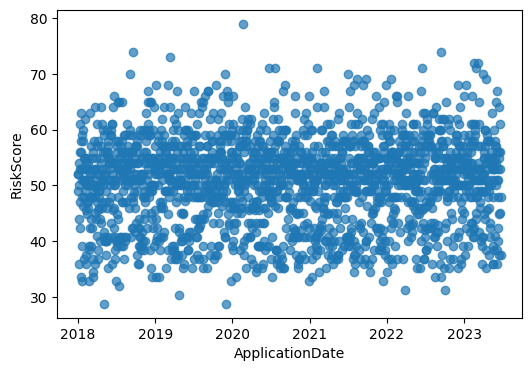

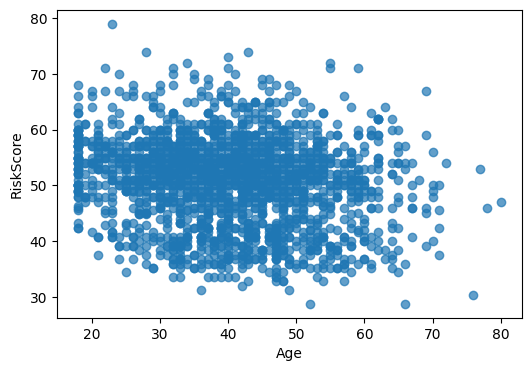

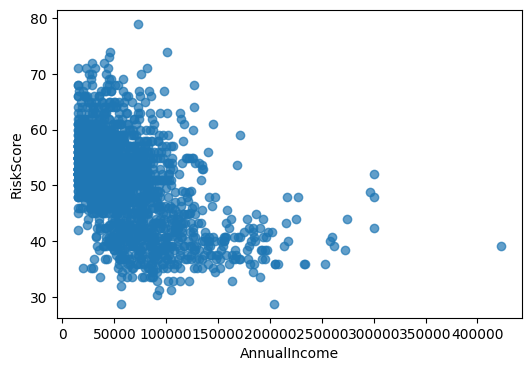

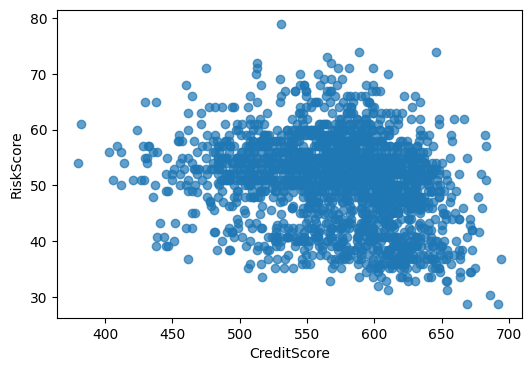

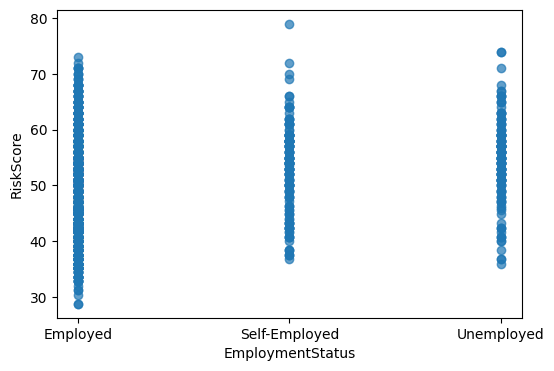

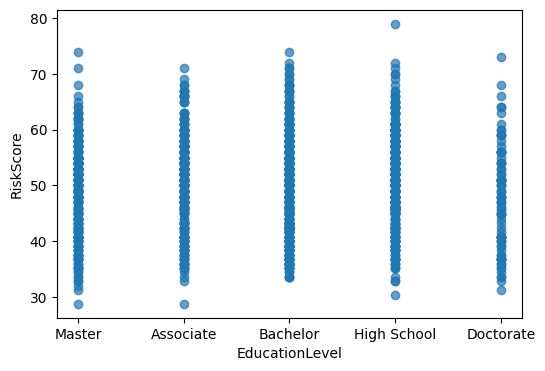

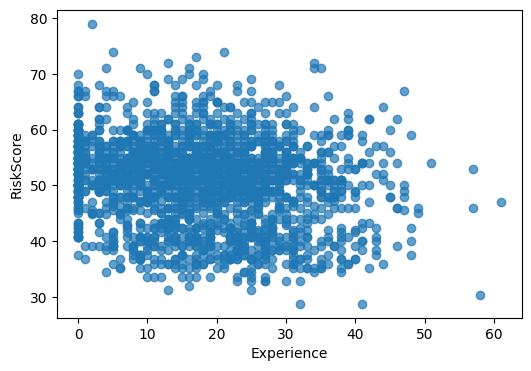

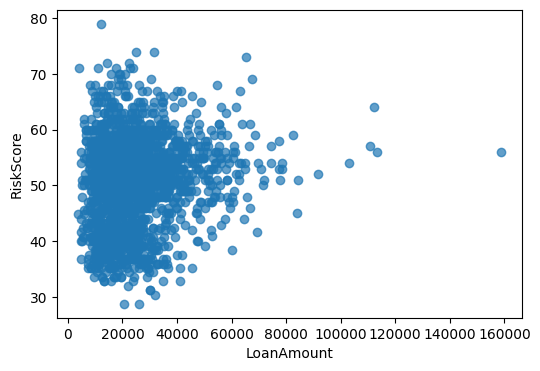

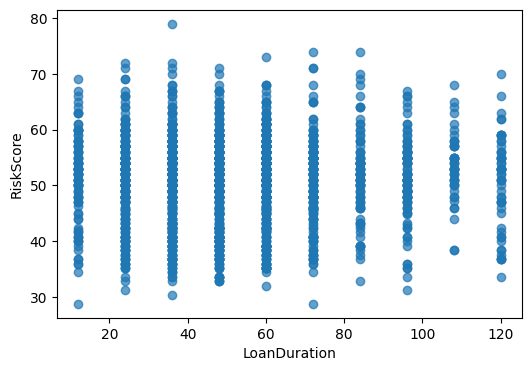

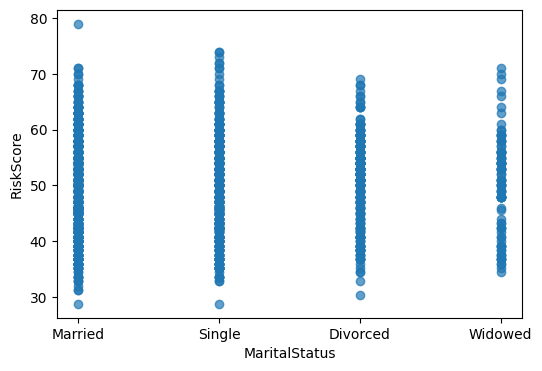

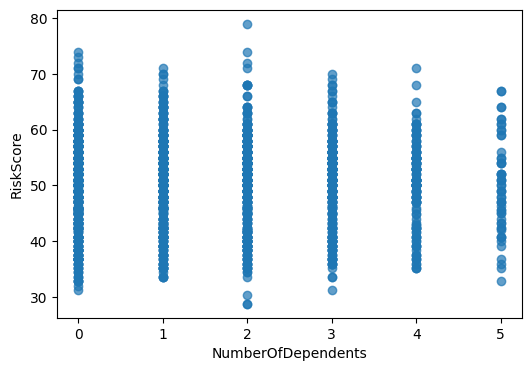

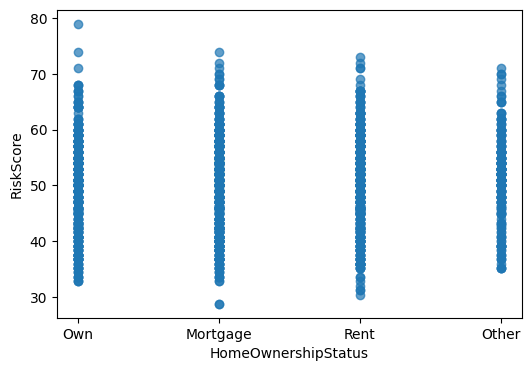

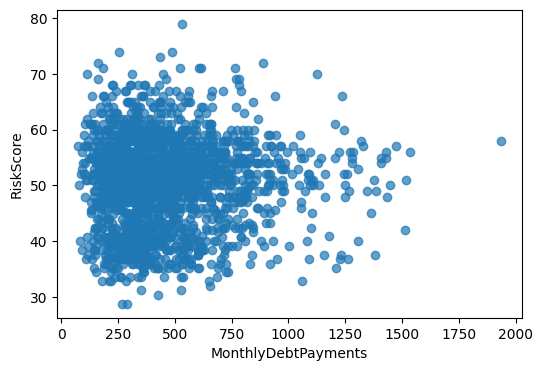

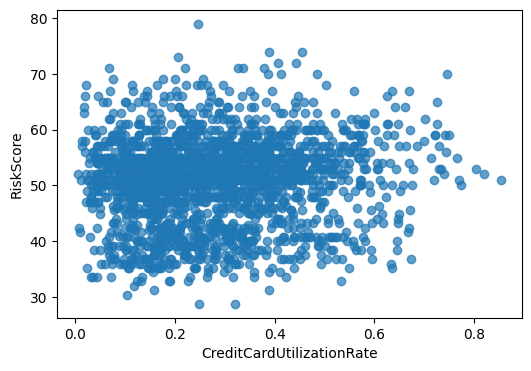

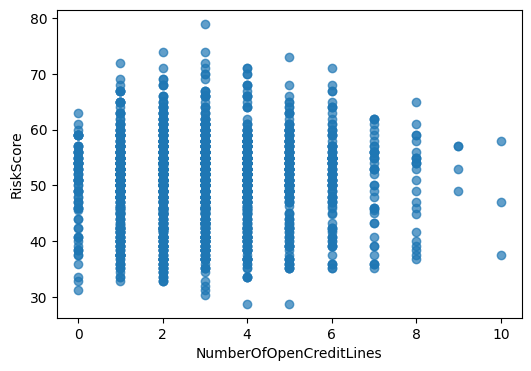

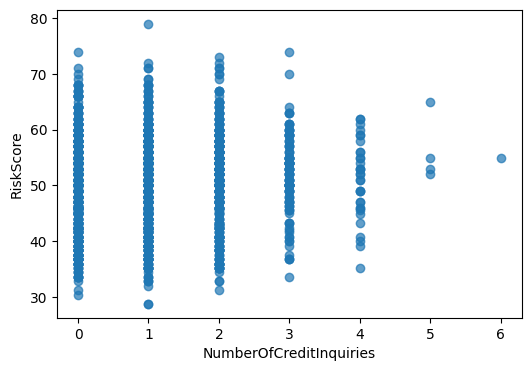

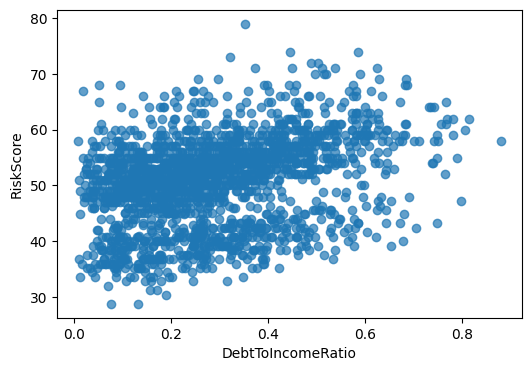

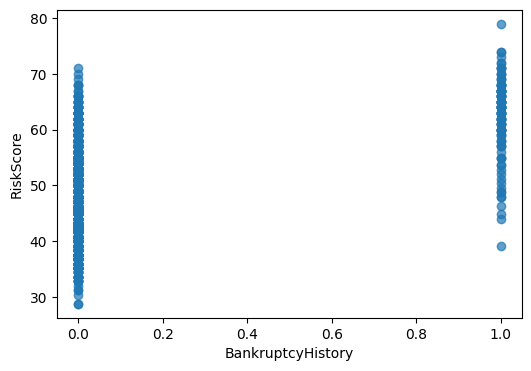

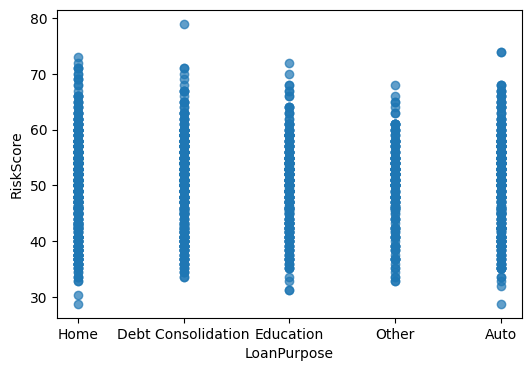

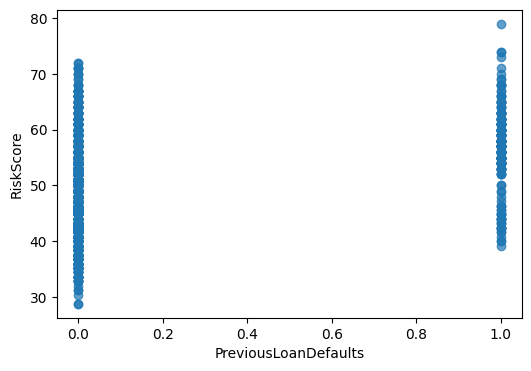

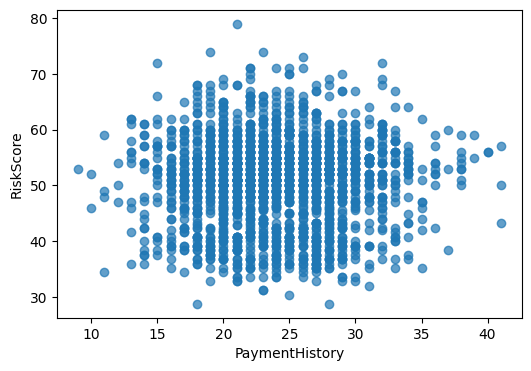

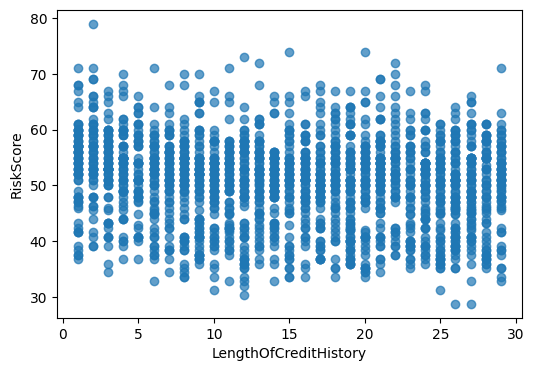

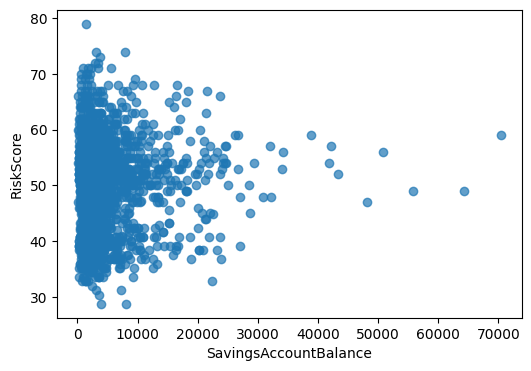

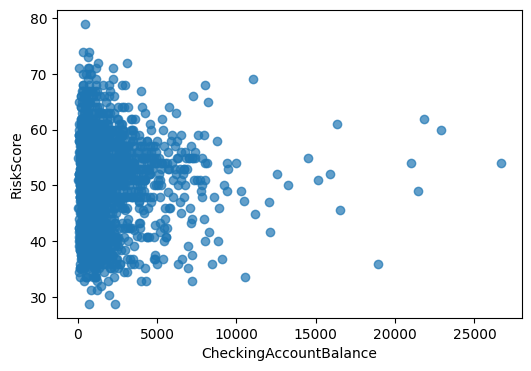

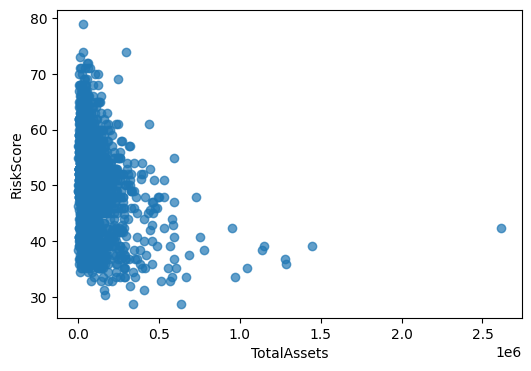

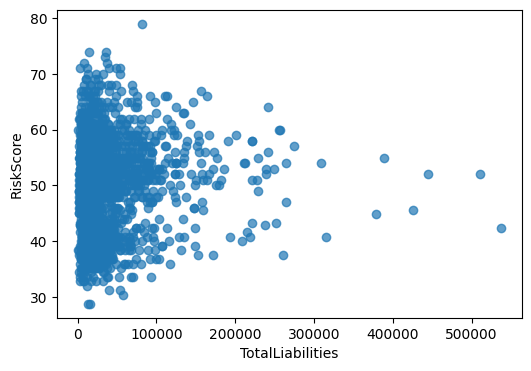

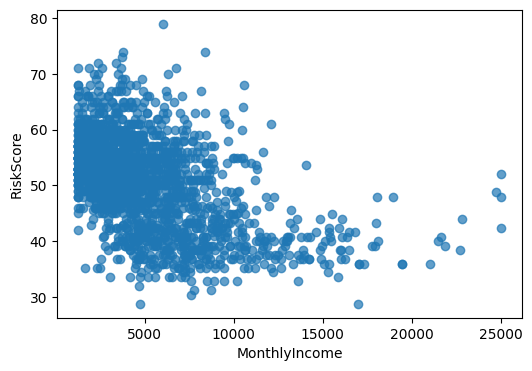

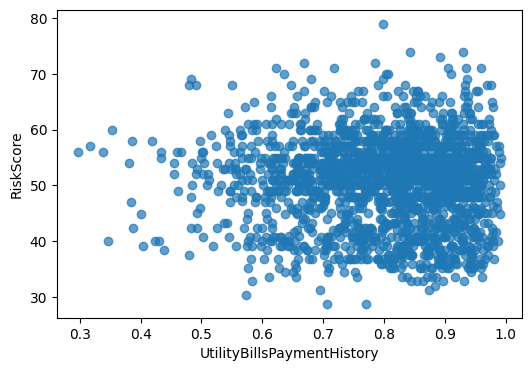

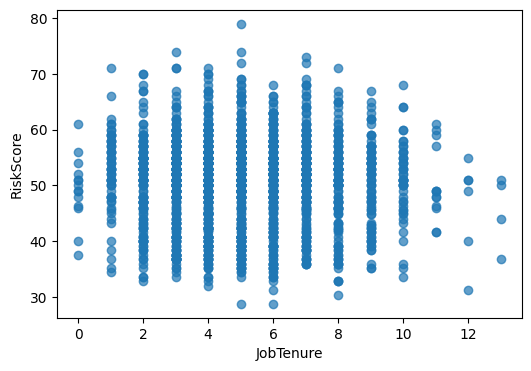

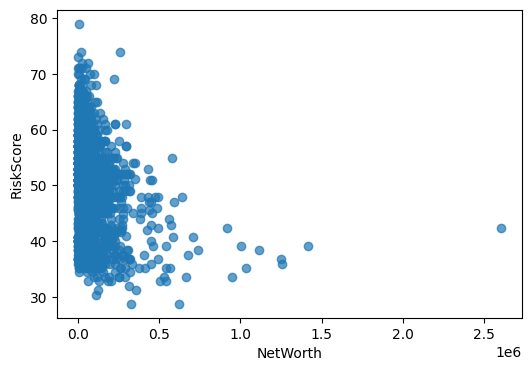

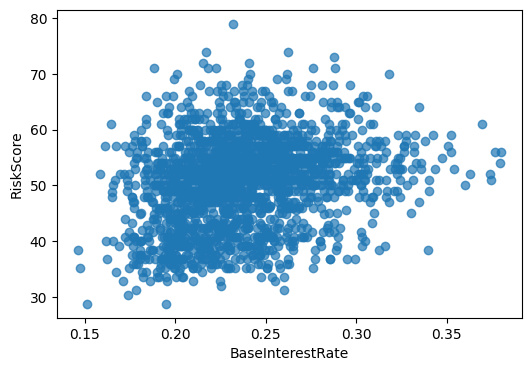

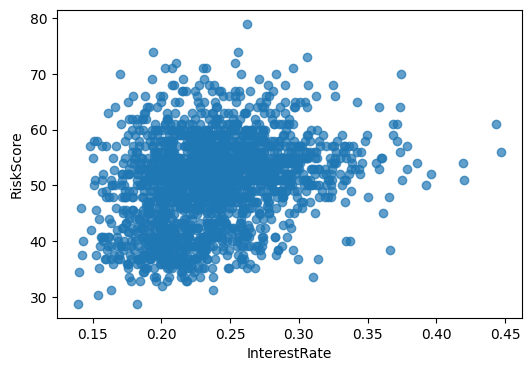

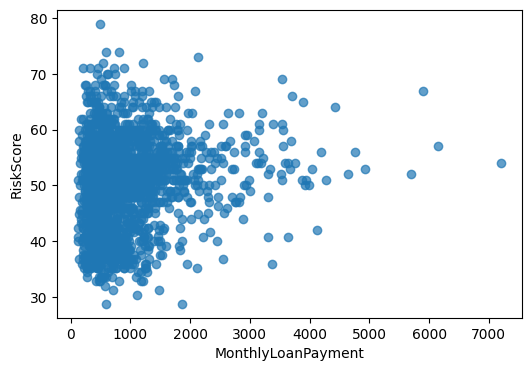

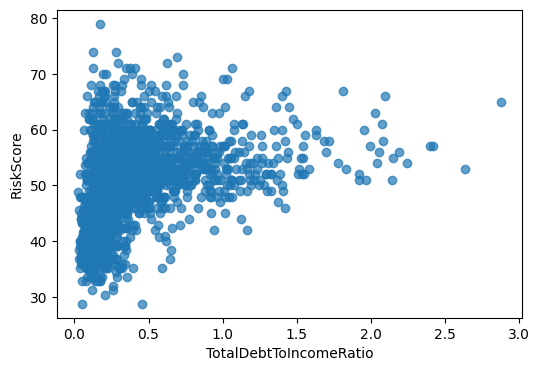

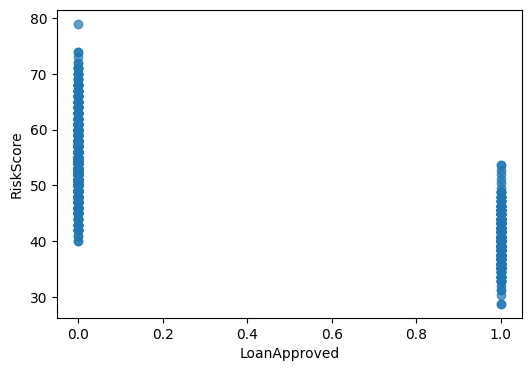

In [ ]:
# Replace 'risk_score' with the actual column name for the risk score column.
risk_score_column = 'RiskScore'

# Loop through columns 1 to 36 (assuming 0-based index for Python).
for column in data.columns[0:35]:
    if column == risk_score_column:
        continue  # Skip the risk score column if it's within the range

    plt.figure(figsize=(6, 4))
    plt.scatter(data[column], data[risk_score_column], alpha=0.7)
    plt.xlabel(column)
    plt.ylabel(risk_score_column)
    plt.show()

## Age

<ipython-input-15-7ee9f4a6f49b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='RiskScore', data=data, palette='Set2')


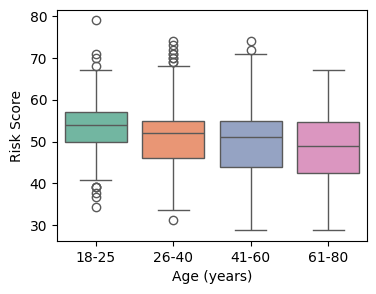

<ipython-input-15-7ee9f4a6f49b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_age = data.groupby('Age')['LoanApproved'].value_counts().unstack(fill_value=0)


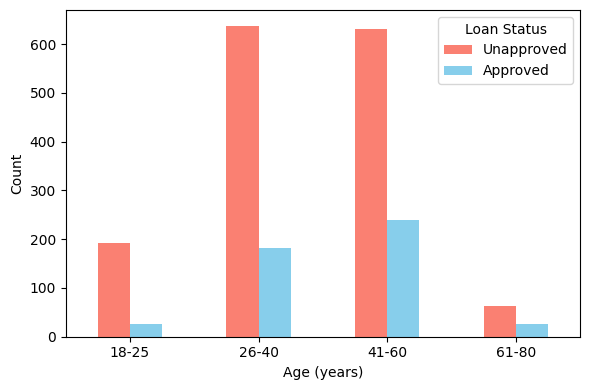

In [ ]:
bins = [18, 25, 40, 60, 80]
labels = ['18-25', '26-40', '41-60', '61-80']
data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4, 3))
sns.boxplot(x='Age', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Age (years)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_age = data.groupby('Age')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_age.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##Annual Income

<ipython-input-74-e7302d524ff8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AnnualIncome', y='RiskScore', data=data, palette='Set2')


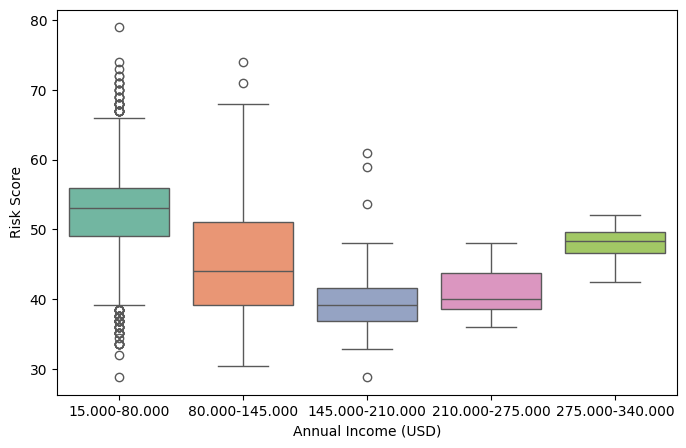

<ipython-input-74-e7302d524ff8>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_ai = data.groupby('AnnualIncome')['LoanApproved'].value_counts().unstack(fill_value=0)


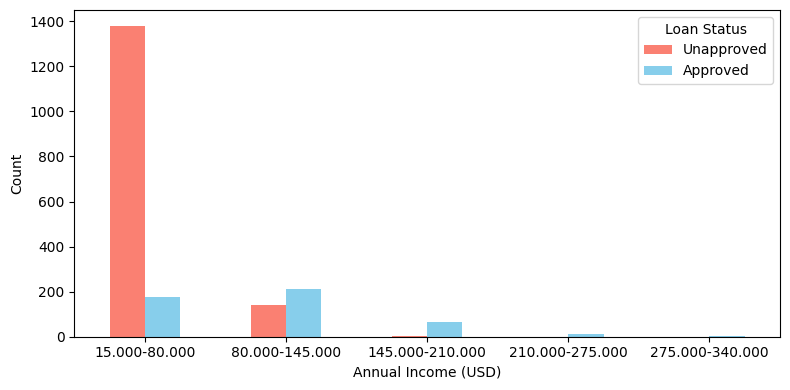

In [ ]:
bins = [15000, 80000, 145000, 210000, 275000, 340000]
labels = ['15.000-80.000', '80.000-145.000', '145.000-210.000', '210.000-275.000', '275.000-340.000']
data['AnnualIncome'] = pd.cut(data['AnnualIncome'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='AnnualIncome', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_ai = data.groupby('AnnualIncome')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ai.plot(kind='bar', stacked=False, figsize=(8, 4), color=['salmon', 'skyblue'])
plt.xlabel('Annual Income (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Credit Score

<ipython-input-17-bd4c5231bb24>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CreditScore', y='RiskScore', data=data, palette='Set2')


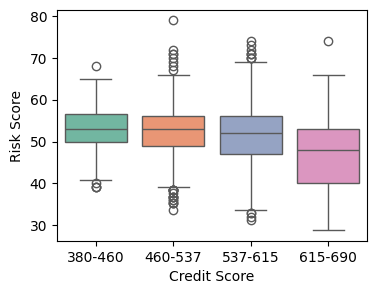

<ipython-input-17-bd4c5231bb24>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_cs = data.groupby('CreditScore')['LoanApproved'].value_counts().unstack(fill_value=0)


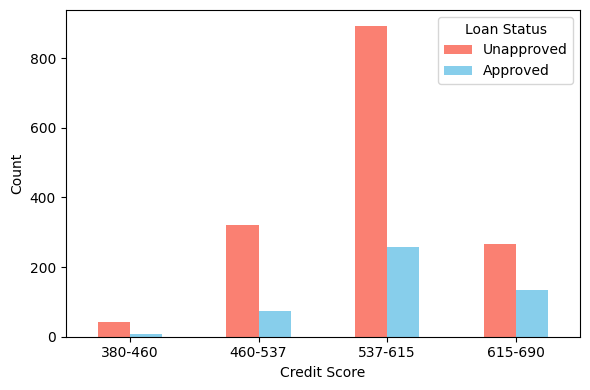

In [ ]:
bins = [380, 460, 537, 615, 690]  # 5 edges, 4 intervals
labels = ['380-460', '460-537', '537-615', '615-690']  # 4 labels

data['CreditScore'] = pd.cut(data['CreditScore'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4, 3))
sns.boxplot(x='CreditScore', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Credit Score')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_cs = data.groupby('CreditScore')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_cs.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Employment Status

<ipython-input-18-443969e3f158>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EmploymentStatus', y='RiskScore', data=data, palette='Set2')


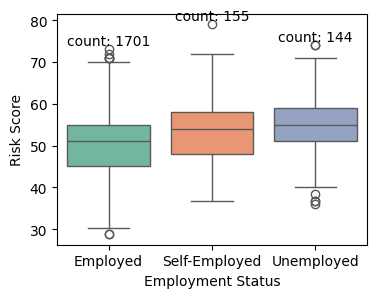

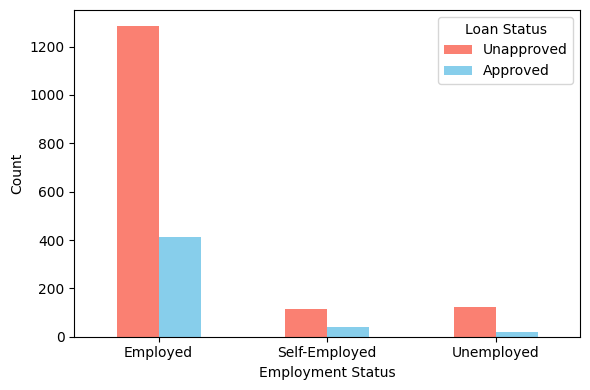

In [ ]:
# Count the number of data points in each category
employment_counts = data['EmploymentStatus'].value_counts()

# Plot
plt.figure(figsize=(4,3))
sns.boxplot(x='EmploymentStatus', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(employment_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['EmploymentStatus'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size=10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Employment Status')
plt.ylabel('Risk Score')
plt.show()

employment_loan_counts = data.groupby(['EmploymentStatus', 'LoanApproved']).size().unstack(fill_value=0)

# Plot the bar chart
employment_loan_counts.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(6, 4))

# Adding title and labels
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Education Level

<ipython-input-75-a526129fae20>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EducationLevel', y='RiskScore', data=data, palette='Set2')


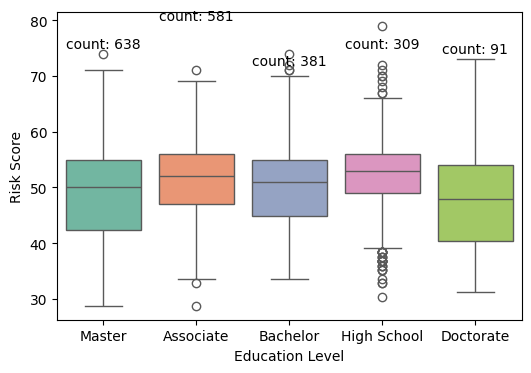

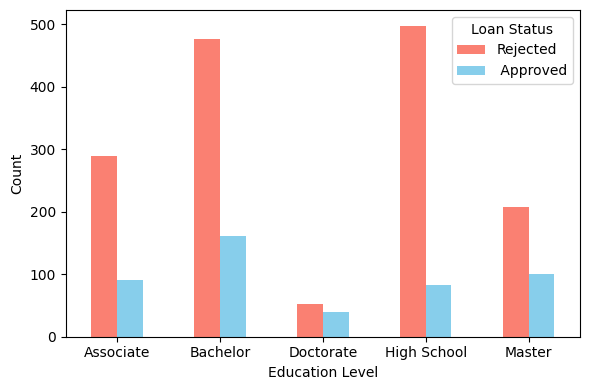

In [ ]:
# Count the number of data points in each category
education_counts = data['EducationLevel'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='EducationLevel', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(education_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['EducationLevel'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Education Level')
plt.ylabel('Risk Score')
plt.show()

education_loan_counts = data.groupby(['EducationLevel', 'LoanApproved']).size().unstack(fill_value=0)

# Plot the bar chart
education_loan_counts.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(6, 4))

# Adding title and labels
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(['Rejected', ' Approved'], title='Loan Status')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Experience

<ipython-input-76-1a0294ca150d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Experience', y='RiskScore', data=data, palette='Set2')


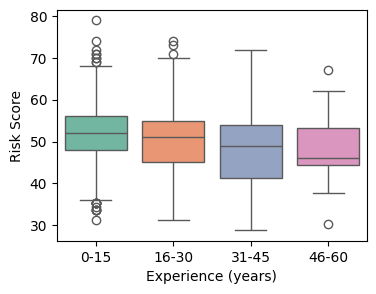

<ipython-input-76-1a0294ca150d>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_exp = data.groupby('Experience')['LoanApproved'].value_counts().unstack(fill_value=0)


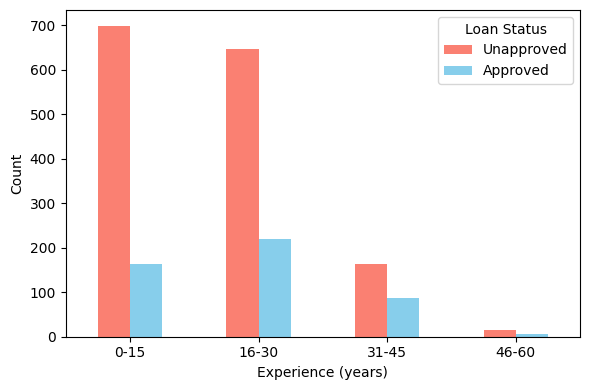

In [ ]:
bins = [0, 15, 30, 45, 60]
labels = ['0-15', '16-30', '31-45', '46-60']
data['Experience'] = pd.cut(data['Experience'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4, 3))
sns.boxplot(x='Experience', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Experience (years)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_exp = data.groupby('Experience')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_exp.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Experience (years)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Loan Amount

<ipython-input-21-f1ff2987eae1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LoanAmount', y='RiskScore', data=data, palette='Set2')


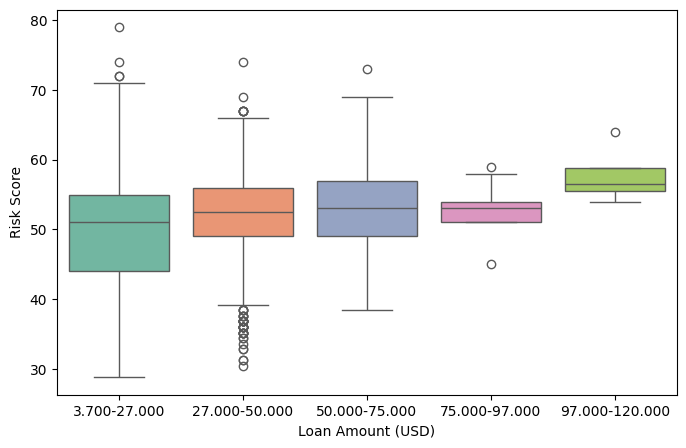

<ipython-input-21-f1ff2987eae1>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_la = data.groupby('LoanAmount')['LoanApproved'].value_counts().unstack(fill_value=0)


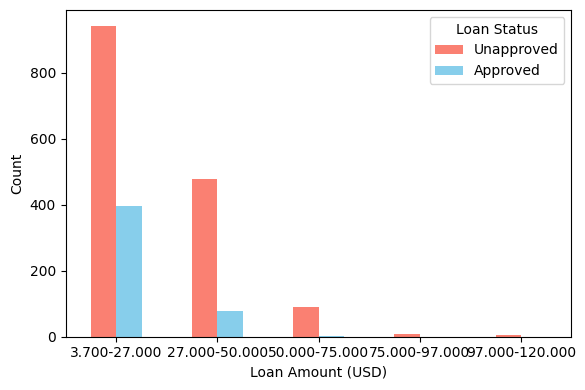

In [ ]:
bins = [3700, 27000, 50000, 75000, 97000, 120000]
labels = ['3.700-27.000', '27.000-50.000', '50.000-75.000', '75.000-97.000', '97.000-120.000']
data['LoanAmount'] = pd.cut(data['LoanAmount'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='LoanAmount', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Loan Amount (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_la = data.groupby('LoanAmount')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_la.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Loan Amount (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Loan Duration

<ipython-input-80-e7e3534a2e2f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LoanDuration', y='RiskScore', data=data, palette='Set2')


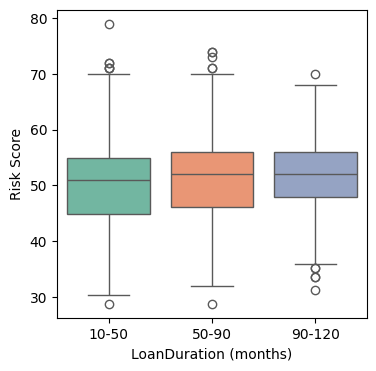

<ipython-input-80-e7e3534a2e2f>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_ld = data.groupby('LoanDuration')['LoanApproved'].value_counts().unstack(fill_value=0)


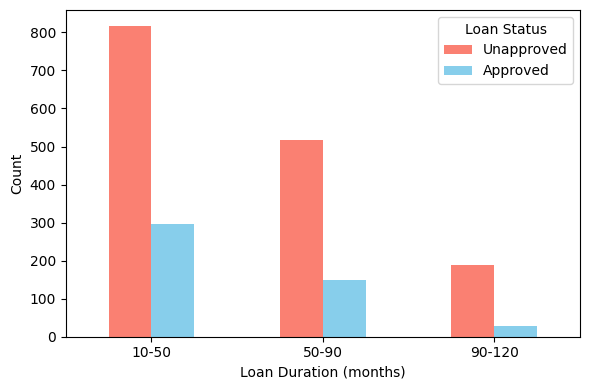

In [ ]:
bins = [10, 50, 90, 120]
labels = ['10-50', '50-90', '90-120']
data['LoanDuration'] = pd.cut(data['LoanDuration'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4, 4))
sns.boxplot(x='LoanDuration', y='RiskScore', data=data, palette='Set2')
plt.xlabel('LoanDuration (months)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_ld = data.groupby('LoanDuration')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ld.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Loan Duration (months)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## Marital Status

<ipython-input-22-06043837a1fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MaritalStatus', y='RiskScore', data=data, palette='Set2')


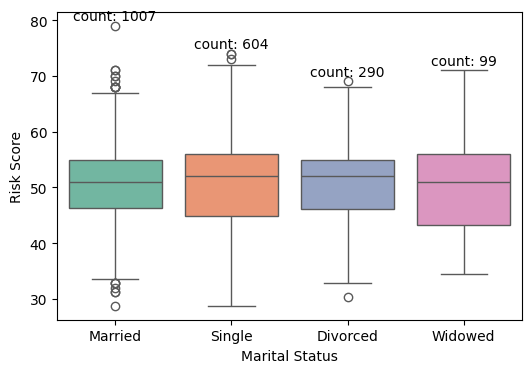

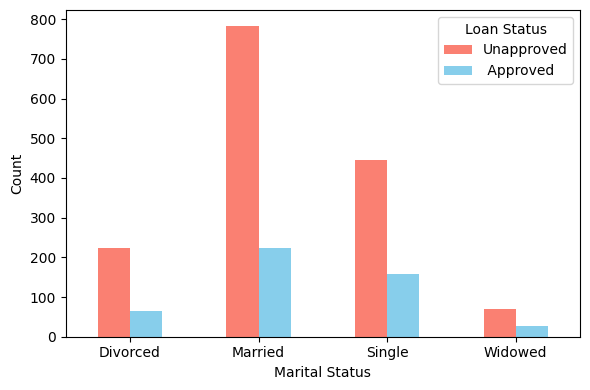

In [ ]:
# Count the number of data points in each category
marital_counts = data['MaritalStatus'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='MaritalStatus', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(marital_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['MaritalStatus'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Marital Status')
plt.ylabel('Risk Score')
plt.show()

marital_loan_counts = data.groupby(['MaritalStatus', 'LoanApproved']).size().unstack(fill_value=0)

# Plot the bar chart
marital_loan_counts.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(6, 4))

# Adding title and labels
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(['Unapproved', ' Approved'], title='Loan Status')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##Number of Dependents

<ipython-input-23-82f74ad2faa8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NumberOfDependents', y='RiskScore', data=data, palette='Set2')


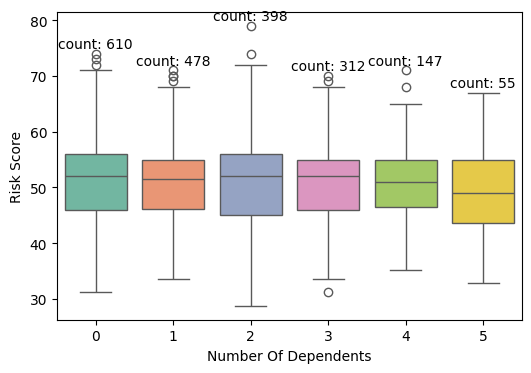

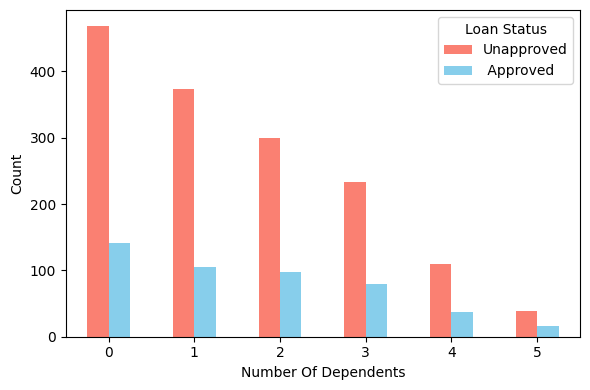

In [ ]:
# Count the number of data points in each category
dependent_counts = data['NumberOfDependents'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='NumberOfDependents', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(dependent_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['NumberOfDependents'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Number Of Dependents')
plt.ylabel('Risk Score')
plt.show()

nod_loan_counts = data.groupby(['NumberOfDependents', 'LoanApproved']).size().unstack(fill_value=0)

# Plot the bar chart
nod_loan_counts.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(6, 4))

# Adding title and labels
plt.xlabel('Number Of Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(['Unapproved', ' Approved'], title='Loan Status')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##HomeOwnershipStatus

<ipython-input-24-f4ce83812618>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HomeOwnershipStatus', y='RiskScore', data=data, palette='Set2')


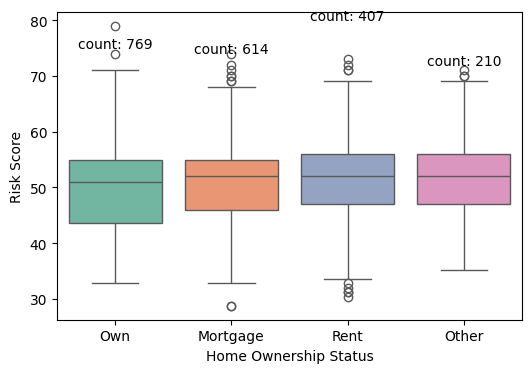

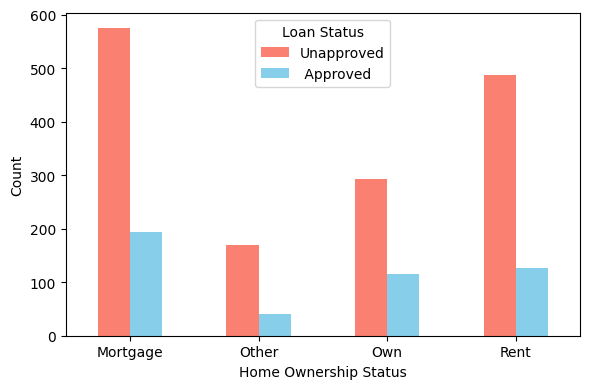

In [ ]:
# Count the number of data points in each category
home_counts = data['HomeOwnershipStatus'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='HomeOwnershipStatus', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(home_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['HomeOwnershipStatus'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Home Ownership Status')
plt.ylabel('Risk Score')
plt.show()

hos_loan_counts = data.groupby(['HomeOwnershipStatus', 'LoanApproved']).size().unstack(fill_value=0)

# Plot the bar chart
hos_loan_counts.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(6, 4))

# Adding title and labels
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(['Unapproved', ' Approved'], title='Loan Status')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##Monthly Debt Payments

<ipython-input-25-af718011e839>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonthlyDebtPayments', y='RiskScore', data=data, palette='Set2')


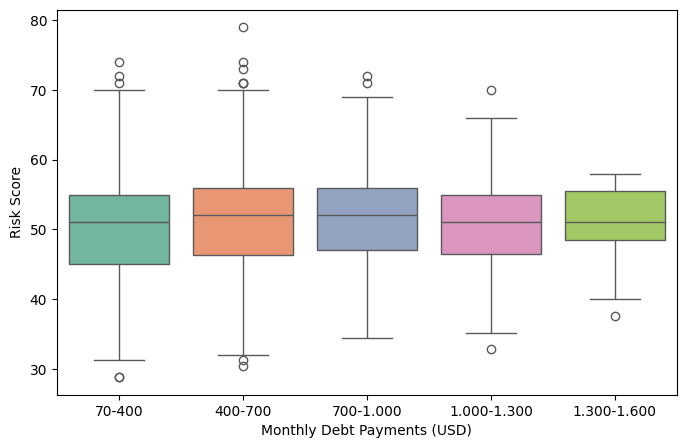

<ipython-input-25-af718011e839>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_mdp = data.groupby('MonthlyDebtPayments')['LoanApproved'].value_counts().unstack(fill_value=0)


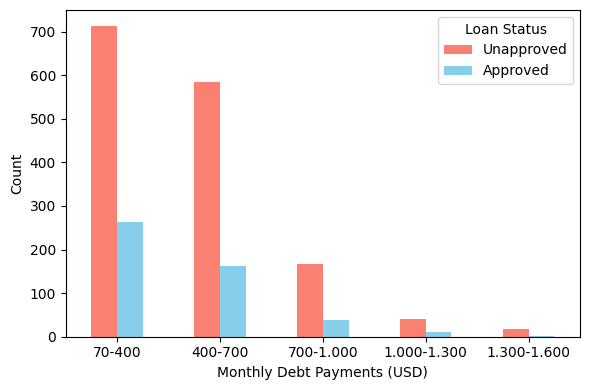

In [ ]:
bins = [70, 400, 700, 1000, 1300, 1600]
labels = ['70-400', '400-700', '700-1.000', '1.000-1.300', '1.300-1.600']
data['MonthlyDebtPayments'] = pd.cut(data['MonthlyDebtPayments'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='MonthlyDebtPayments', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Monthly Debt Payments (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_mdp = data.groupby('MonthlyDebtPayments')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_mdp.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Monthly Debt Payments (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##CreditCardUtilizationRate



<ipython-input-26-06b2d5e273a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CreditCardUtilizationRate', y='RiskScore', data=data, palette='Set2')


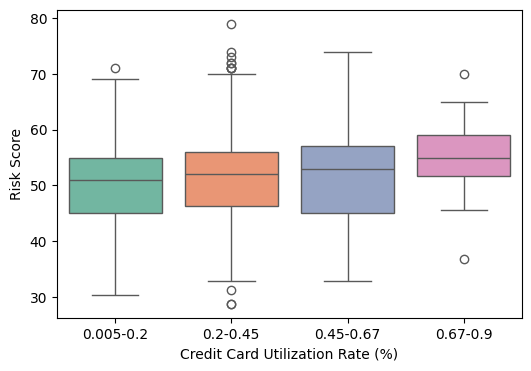

<ipython-input-26-06b2d5e273a6>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_ccur = data.groupby('CreditCardUtilizationRate')['LoanApproved'].value_counts().unstack(fill_value=0)


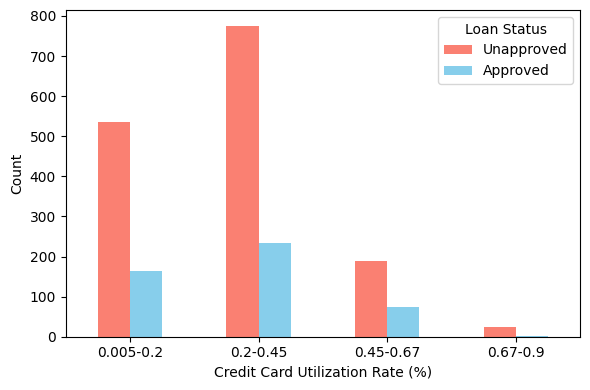

In [ ]:
bins = [0.005, 0.200, 0.450, 0.670, 0.900]
labels = ['0.005-0.2', '0.2-0.45', '0.45-0.67', '0.67-0.9']
data['CreditCardUtilizationRate'] = pd.cut(data['CreditCardUtilizationRate'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='CreditCardUtilizationRate', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Credit Card Utilization Rate (%)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_ccur = data.groupby('CreditCardUtilizationRate')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ccur.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Credit Card Utilization Rate (%)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## NumberOfOpenCreditLines


<ipython-input-27-48341258317c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NumberOfOpenCreditLines', y='RiskScore', data=data, palette='Set2')


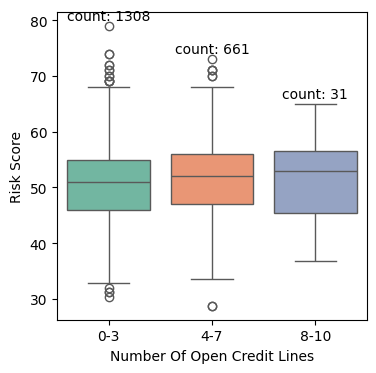

<ipython-input-27-48341258317c>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_nocl = data.groupby('NumberOfOpenCreditLines')['LoanApproved'].value_counts().unstack(fill_value=0)


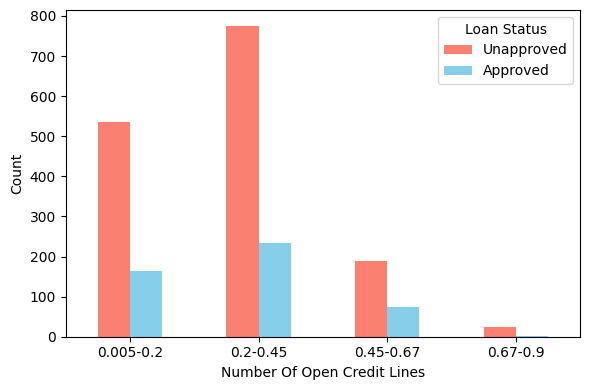

In [ ]:
bins = [0, 3, 7, 10]
labels = ['0-3','4-7','8-10']
data['NumberOfOpenCreditLines'] = pd.cut(data['NumberOfOpenCreditLines'], bins=bins, labels=labels, right=True, include_lowest=True)

# Count the occurrences of each range
nop_counts = data['NumberOfOpenCreditLines'].value_counts()

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='NumberOfOpenCreditLines', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(nop_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['NumberOfOpenCreditLines'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Number Of Open Credit Lines')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_nocl = data.groupby('NumberOfOpenCreditLines')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ccur.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Number Of Open Credit Lines')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## NumberOfCreditInquiries

<ipython-input-28-33615abfec15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NumberOfCreditInquiries', y='RiskScore', data=data, palette='Set2')


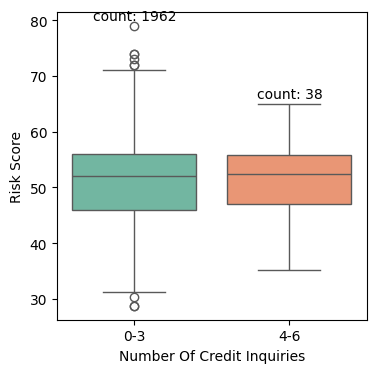

<ipython-input-28-33615abfec15>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_noci = data.groupby('NumberOfCreditInquiries')['LoanApproved'].value_counts().unstack(fill_value=0)


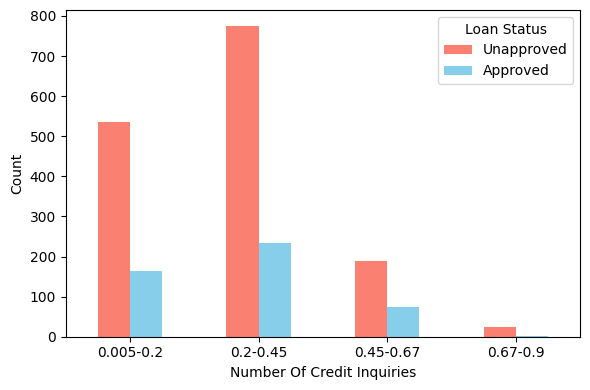

In [ ]:
bins = [0, 3, 6]
labels = ['0-3','4-6']
data['NumberOfCreditInquiries'] = pd.cut(data['NumberOfCreditInquiries'], bins=bins, labels=labels, right=True, include_lowest=True)

# Count the occurrences of each range
noci_counts = data['NumberOfCreditInquiries'].value_counts()

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='NumberOfCreditInquiries', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(noci_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['NumberOfCreditInquiries'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Number Of Credit Inquiries')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_noci = data.groupby('NumberOfCreditInquiries')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ccur.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Number Of Credit Inquiries')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## DebtToIncomeRatio

<ipython-input-81-9c9389c6f54c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DebtToIncomeRatio', y='RiskScore', data=data, palette='Set2')


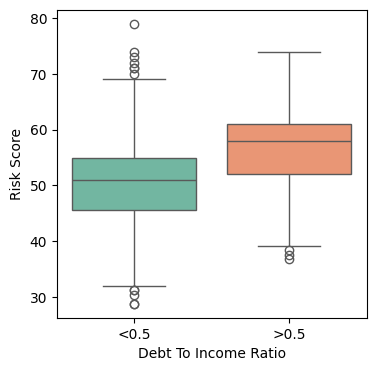

<ipython-input-81-9c9389c6f54c>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_dtio = data.groupby('DebtToIncomeRatio')['LoanApproved'].value_counts().unstack(fill_value=0)


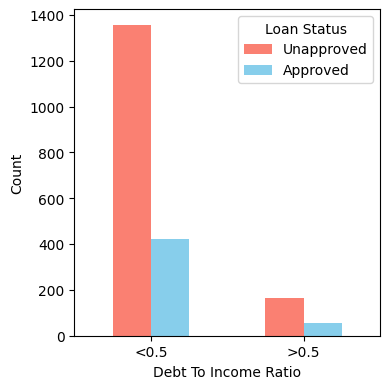

In [ ]:
bins = [0.0, 0.5, 0.8]
labels = ['<0.5', '>0.5']
data['DebtToIncomeRatio'] = pd.cut(data['DebtToIncomeRatio'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4, 4))
sns.boxplot(x='DebtToIncomeRatio', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_dtio = data.groupby('DebtToIncomeRatio')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_dtio.plot(kind='bar', stacked=False, figsize=(4, 4), color=['salmon', 'skyblue'])
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## BankruptcyHistory

<ipython-input-30-047c5d4d5e76>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BankruptcyHistory', y='RiskScore', data=data, palette='Set2')


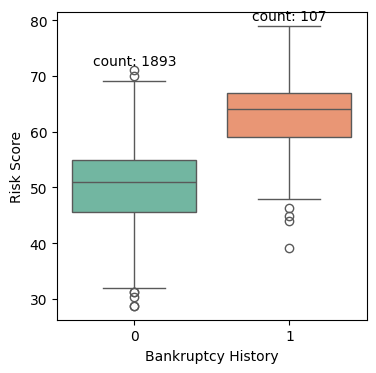

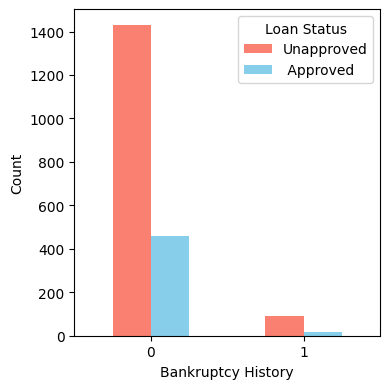

In [ ]:
# Count the number of data points in each category
bh_counts = data['BankruptcyHistory'].value_counts()

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='BankruptcyHistory', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(bh_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['BankruptcyHistory'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Bankruptcy History')
plt.ylabel('Risk Score')
plt.show()

bh_loan_counts = data.groupby(['BankruptcyHistory', 'LoanApproved']).size().unstack(fill_value=0)

# Plot the bar chart
bh_loan_counts.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(4, 4))

# Adding title and labels
plt.xlabel('Bankruptcy History')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(['Unapproved', ' Approved'], title='Loan Status')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## LoanPurpose

<ipython-input-31-b856514147be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LoanPurpose', y='RiskScore', data=data, palette='Set2')


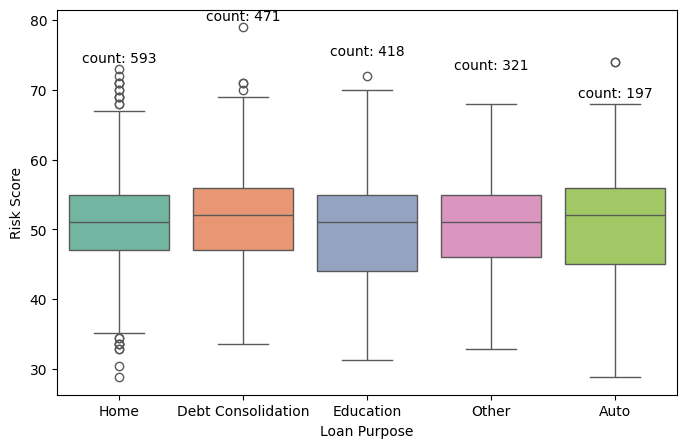

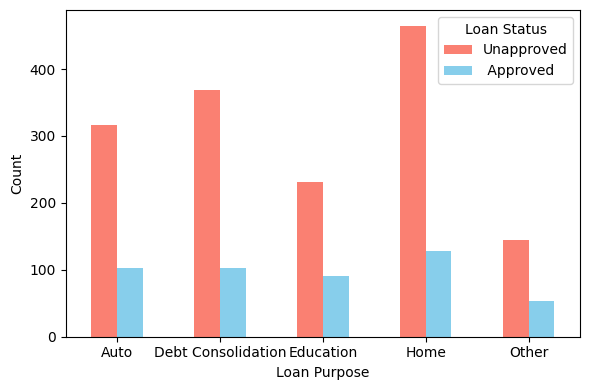

In [ ]:
# Count the number of data points in each category
lp_counts = data['LoanPurpose'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='LoanPurpose', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(lp_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['LoanPurpose'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Loan Purpose')
plt.ylabel('Risk Score')
plt.show()

lp_loan_counts = data.groupby(['LoanPurpose', 'LoanApproved']).size().unstack(fill_value=0)

# Plot the bar chart
lp_loan_counts.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(6, 4))

# Adding title and labels
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(['Unapproved', ' Approved'], title='Loan Status')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## PreviousLoanDefaults

<ipython-input-32-a4639163d352>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PreviousLoanDefaults', y='RiskScore', data=data, palette='Set2')


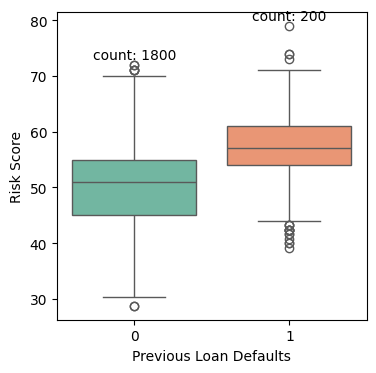

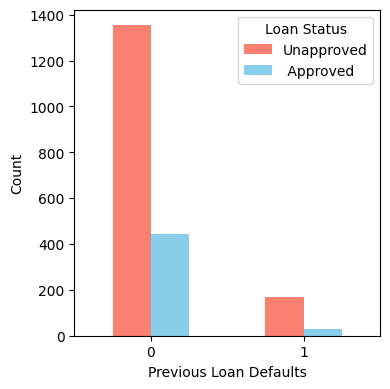

In [ ]:
# Count the number of data points in each category
pld_counts = data['PreviousLoanDefaults'].value_counts()

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='PreviousLoanDefaults', y='RiskScore', data=data, palette='Set2')

# Add count annotations above each boxplot
for i, (status, count) in enumerate(pld_counts.items()):
    plt.text(
        i,  # x-coordinate matches the boxplot position
        data[data['PreviousLoanDefaults'] == status]['RiskScore'].max() + 1,  # y-coordinate slightly above max
        f'count: {count}',  # Annotation text
        horizontalalignment='center',
        size = 10,
        color='black',
        weight='normal'
    )

# Customize and show the plot
plt.xlabel('Previous Loan Defaults')
plt.ylabel('Risk Score')
plt.show()

pld_loan_counts = data.groupby(['PreviousLoanDefaults', 'LoanApproved']).size().unstack(fill_value=0)

# Plot the bar chart
pld_loan_counts.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], figsize=(4, 4))

# Adding title and labels
plt.xlabel('Previous Loan Defaults')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(['Unapproved', ' Approved'], title='Loan Status')
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## PaymentHistory

<ipython-input-33-edf09efd8c79>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PaymentHistory', y='RiskScore', data=data, palette='Set2')


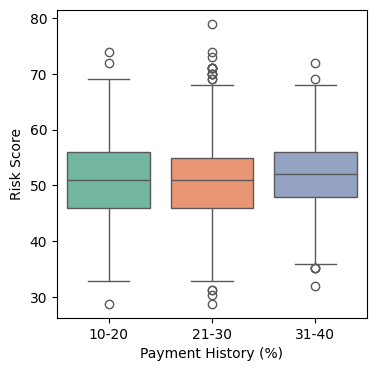

<ipython-input-33-edf09efd8c79>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_ph = data.groupby('PaymentHistory')['LoanApproved'].value_counts().unstack(fill_value=0)


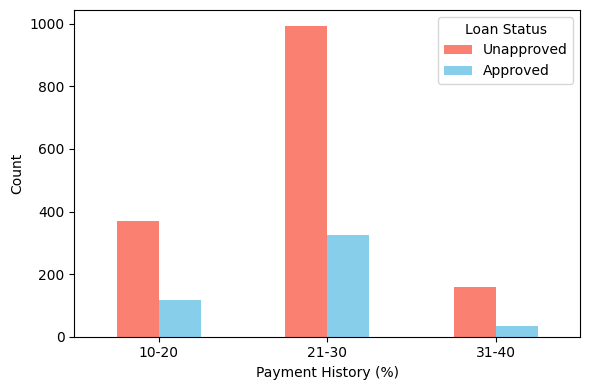

In [ ]:
bins = [9,20,30,41]
labels = ['10-20', '21-30', '31-40']
data['PaymentHistory'] = pd.cut(data['PaymentHistory'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='PaymentHistory', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Payment History (%)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_ph = data.groupby('PaymentHistory')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ph.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Payment History (%)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## LengthOfCreditHistory

<ipython-input-85-30e8a1192006>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LengthOfCreditHistory', y='RiskScore', data=data, palette='Set2')


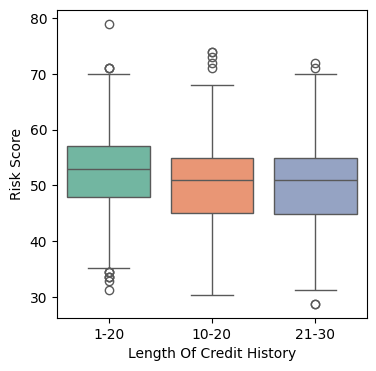

<ipython-input-85-30e8a1192006>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_loch = data.groupby('LengthOfCreditHistory')['LoanApproved'].value_counts().unstack(fill_value=0)


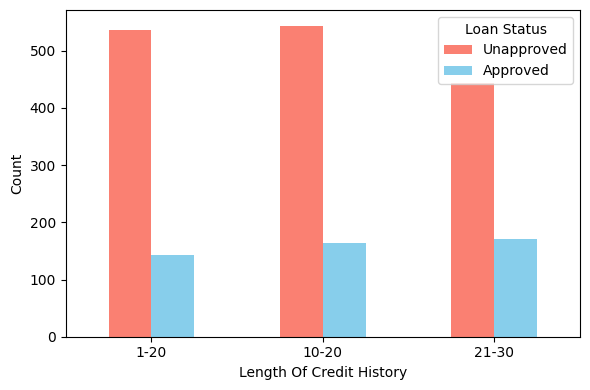

In [ ]:
bins = [1,10,20,30]
labels = ['1-20', '10-20', '21-30']
data['LengthOfCreditHistory'] = pd.cut(data['LengthOfCreditHistory'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='LengthOfCreditHistory', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Length Of Credit History')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_loch = data.groupby('LengthOfCreditHistory')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_loch.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Length Of Credit History')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## SavingsAccountBalance

<ipython-input-35-7ccaa89cdc13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SavingsAccountBalance', y='RiskScore', data=data, palette='Set2')


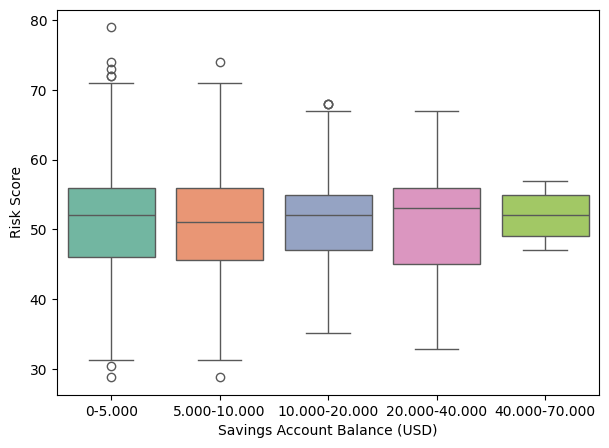

<ipython-input-35-7ccaa89cdc13>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_sab = data.groupby('SavingsAccountBalance')['LoanApproved'].value_counts().unstack(fill_value=0)


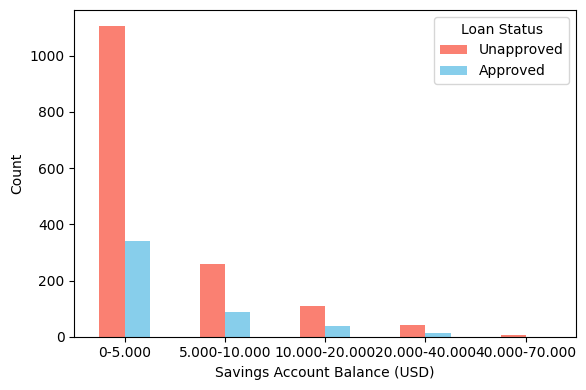

In [ ]:
bins = [0,5000, 10000, 20000, 40000, 70000]
labels = ['0-5.000', '5.000-10.000', '10.000-20.000', '20.000-40.000', '40.000-70.000']
data['SavingsAccountBalance'] = pd.cut(data['SavingsAccountBalance'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(7,5))
sns.boxplot(x='SavingsAccountBalance', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Savings Account Balance (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_sab = data.groupby('SavingsAccountBalance')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_sab.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Savings Account Balance (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## CheckingAccountBalance

<ipython-input-36-1720e41f7437>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CheckingAccountBalance', y='RiskScore', data=data, palette='Set2')


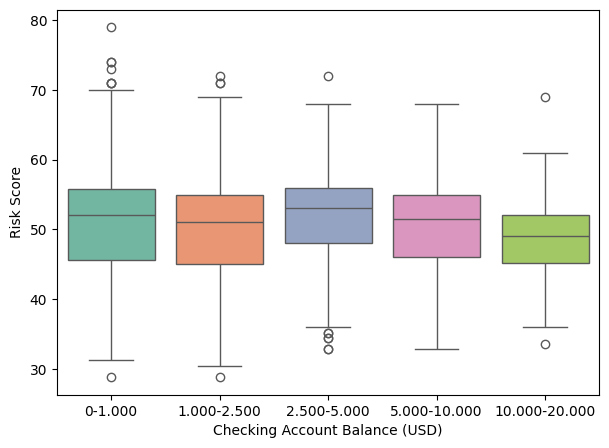

<ipython-input-36-1720e41f7437>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_cab = data.groupby('CheckingAccountBalance')['LoanApproved'].value_counts().unstack(fill_value=0)


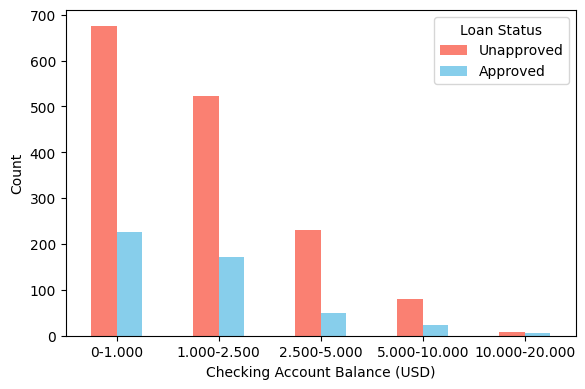

In [ ]:
bins = [0, 1000, 2500, 5000, 10000, 20000]
labels = ['0-1.000', '1.000-2.500', '2.500-5.000', '5.000-10.000', '10.000-20.000']
data['CheckingAccountBalance'] = pd.cut(data['CheckingAccountBalance'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(7,5))
sns.boxplot(x='CheckingAccountBalance', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Checking Account Balance (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_cab = data.groupby('CheckingAccountBalance')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_cab.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Checking Account Balance (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## TotalAssets

<ipython-input-37-440c8c778830>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TotalAssets', y='RiskScore', data=data, palette='Set2')


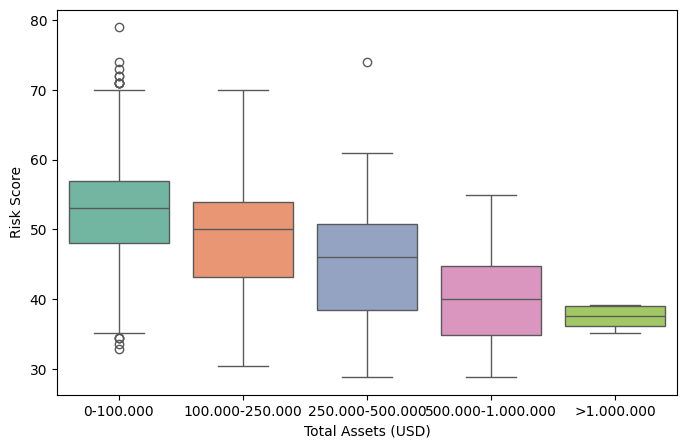

<ipython-input-37-440c8c778830>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_ta = data.groupby('TotalAssets')['LoanApproved'].value_counts().unstack(fill_value=0)


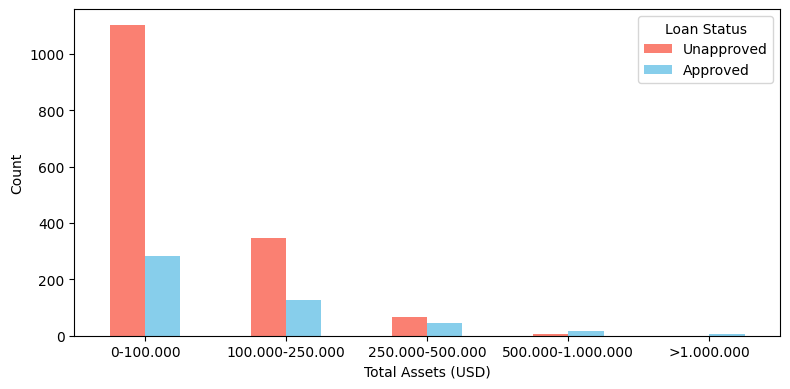

In [ ]:
bins = [0, 100000, 250000, 500000, 1000000, 2000000]
labels = ['0-100.000', '100.000-250.000', '250.000-500.000', '500.000-1.000.000', '>1.000.000']
data['TotalAssets'] = pd.cut(data['TotalAssets'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='TotalAssets', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Total Assets (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_ta = data.groupby('TotalAssets')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ta.plot(kind='bar', stacked=False, figsize=(8, 4), color=['salmon', 'skyblue'])
plt.xlabel('Total Assets (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##TotalLiabilities

<ipython-input-38-3c73aa8bc8c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TotalLiabilities', y='RiskScore', data=data, palette='Set2')


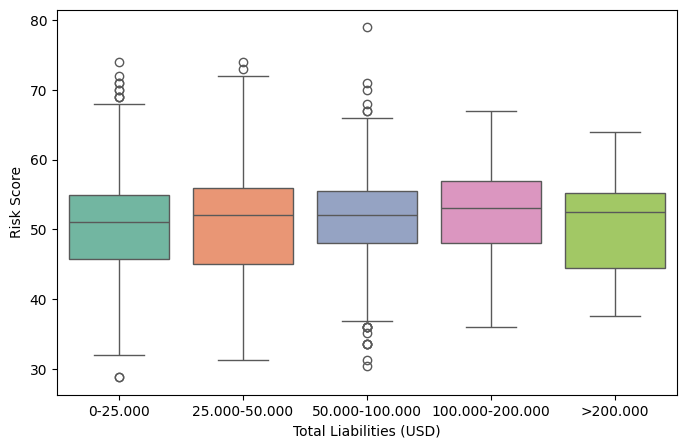

<ipython-input-38-3c73aa8bc8c2>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_tl = data.groupby('TotalLiabilities')['LoanApproved'].value_counts().unstack(fill_value=0)


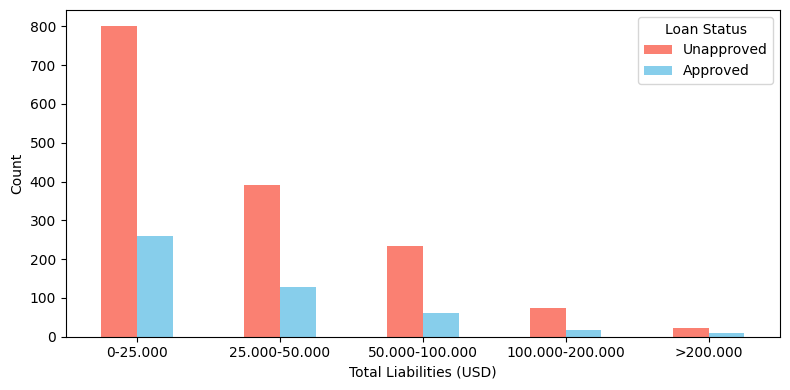

In [ ]:
bins = [0, 25000, 50000, 100000, 200000, 500000]
labels = ['0-25.000', '25.000-50.000', '50.000-100.000', '100.000-200.000', '>200.000']
data['TotalLiabilities'] = pd.cut(data['TotalLiabilities'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='TotalLiabilities', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Total Liabilities (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_tl = data.groupby('TotalLiabilities')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_tl.plot(kind='bar', stacked=False, figsize=(8, 4), color=['salmon', 'skyblue'])
plt.xlabel('Total Liabilities (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## MonthlyIncome

<ipython-input-39-4251c403070f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonthlyIncome', y='RiskScore', data=data, palette='Set2')


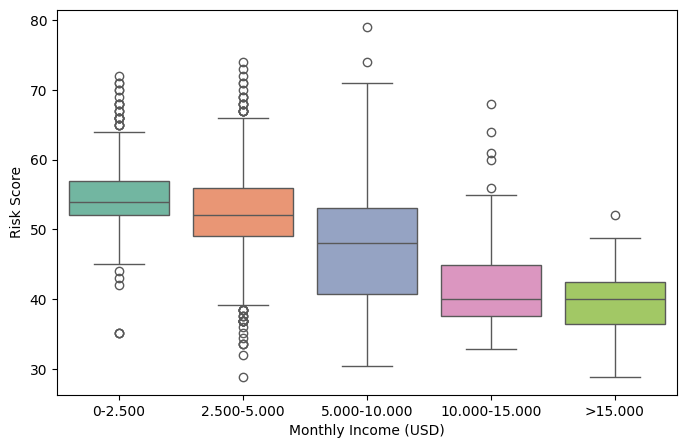

<ipython-input-39-4251c403070f>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_mi = data.groupby('MonthlyIncome')['LoanApproved'].value_counts().unstack(fill_value=0)


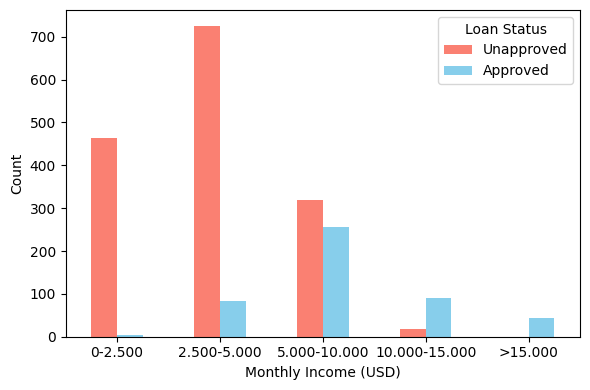

In [ ]:
bins = [0, 2500, 5000, 10000, 15000, 30000]
labels = ['0-2.500', '2.500-5.000', '5.000-10.000', '10.000-15.000', '>15.000']
data['MonthlyIncome'] = pd.cut(data['MonthlyIncome'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='MonthlyIncome', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Monthly Income (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_mi = data.groupby('MonthlyIncome')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_mi.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Monthly Income (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##UtilityBillsPaymentHistory

<ipython-input-40-505dbcf26440>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='UtilityBillsPaymentHistory', y='RiskScore', data=data, palette='Set2')


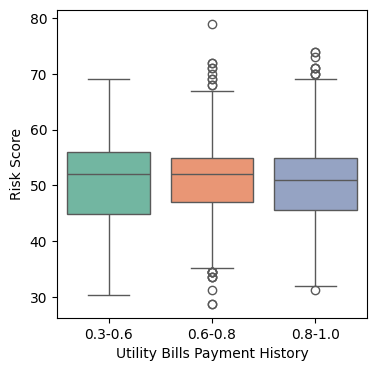

<ipython-input-40-505dbcf26440>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_ubph = data.groupby('UtilityBillsPaymentHistory')['LoanApproved'].value_counts().unstack(fill_value=0)


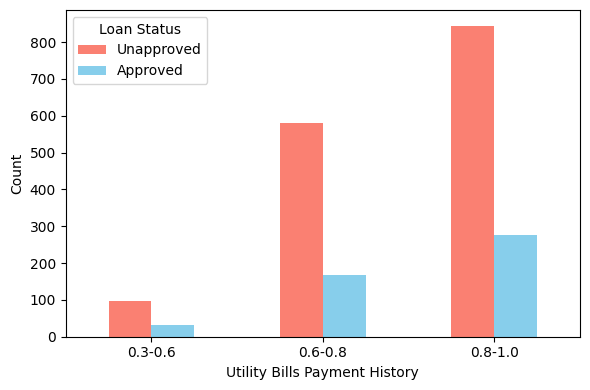

In [ ]:
bins = [0.3, 0.6, 0.8, 1.0]
labels = ['0.3-0.6', '0.6-0.8', '0.8-1.0']
data['UtilityBillsPaymentHistory'] = pd.cut(data['UtilityBillsPaymentHistory'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='UtilityBillsPaymentHistory', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Utility Bills Payment History')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_ubph = data.groupby('UtilityBillsPaymentHistory')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ubph.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Utility Bills Payment History')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

## JobTenure

<ipython-input-41-4e25fd0f6da7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobTenure', y='RiskScore', data=data, palette='Set2')


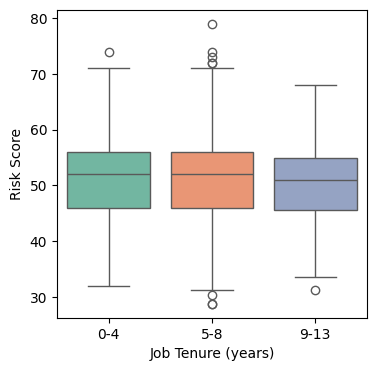

<ipython-input-41-4e25fd0f6da7>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_jt = data.groupby('JobTenure')['LoanApproved'].value_counts().unstack(fill_value=0)


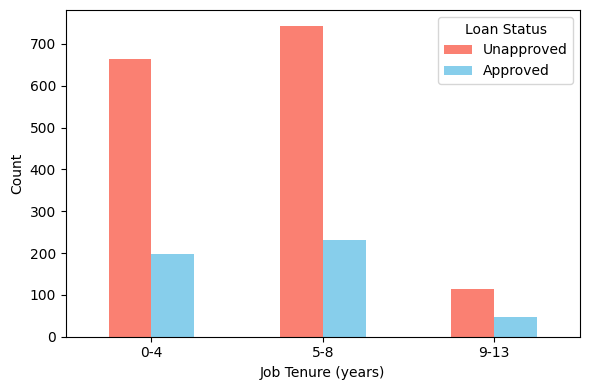

In [ ]:
bins = [0, 4, 8, 13]
labels = ['0-4', '5-8', '9-13']
data['JobTenure'] = pd.cut(data['JobTenure'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='JobTenure', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Job Tenure (years)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_jt = data.groupby('JobTenure')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_jt.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Job Tenure (years)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##NetWorth

<ipython-input-42-51ecaa268a83>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NetWorth', y='RiskScore', data=data, palette='Set2')


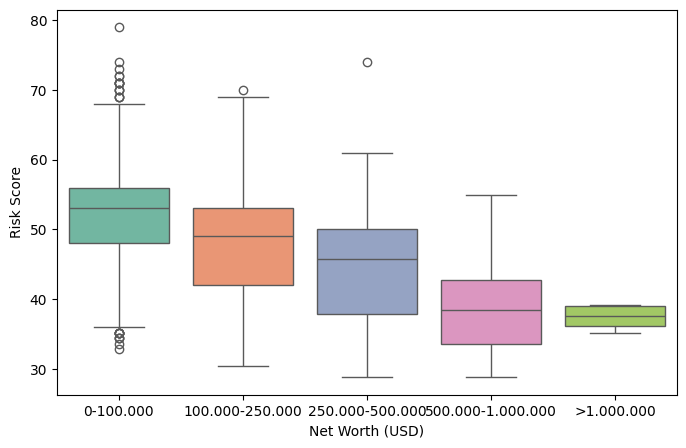

<ipython-input-42-51ecaa268a83>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_nw = data.groupby('NetWorth')['LoanApproved'].value_counts().unstack(fill_value=0)


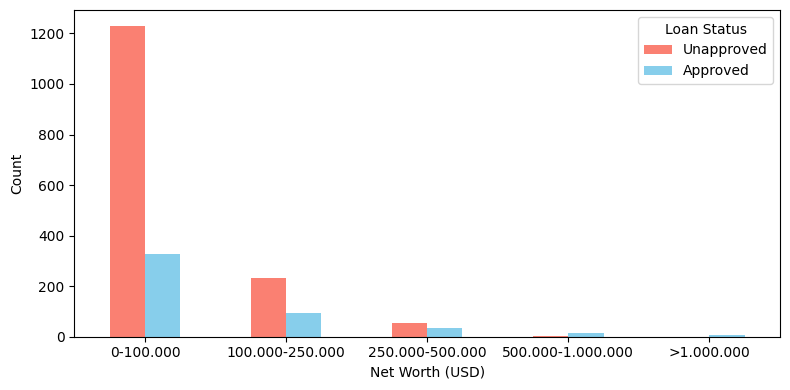

In [ ]:
bins = [0, 100000, 250000, 500000, 1000000, 1500000]
labels = ['0-100.000', '100.000-250.000', '250.000-500.000', '500.000-1.000.000', '>1.000.000']
data['NetWorth'] = pd.cut(data['NetWorth'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='NetWorth', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Net Worth (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_nw = data.groupby('NetWorth')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_nw.plot(kind='bar', stacked=False, figsize=(8, 4), color=['salmon', 'skyblue'])
plt.xlabel('Net Worth (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##BaseInterestRate

<ipython-input-59-f0f519a071d0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BaseInterestRate', y='RiskScore', data=data, palette='Set2')


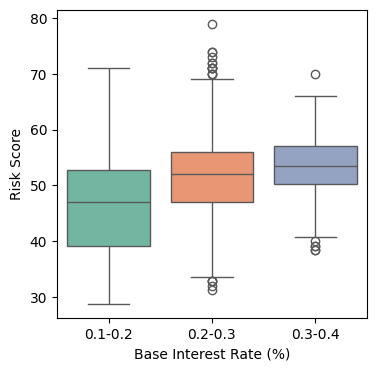

<ipython-input-59-f0f519a071d0>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_bir = data.groupby('BaseInterestRate')['LoanApproved'].value_counts().unstack(fill_value=0)


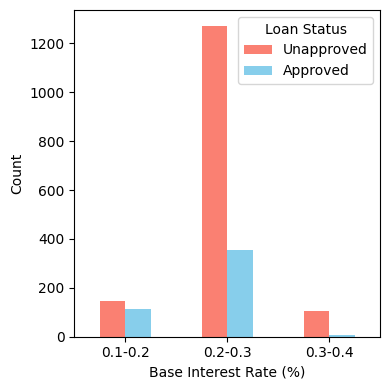

In [ ]:
bins = [0.1, 0.2, 0.3, 0.4]
labels = ['0.1-0.2', '0.2-0.3', '0.3-0.4']
data['BaseInterestRate'] = pd.cut(data['BaseInterestRate'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='BaseInterestRate', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Base Interest Rate (%)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_bir = data.groupby('BaseInterestRate')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_bir.plot(kind='bar', stacked=False, figsize=(4, 4), color=['salmon', 'skyblue'])
plt.xlabel('Base Interest Rate (%)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##InterestRate

<ipython-input-60-04b013a0d1ad>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='InterestRate', y='RiskScore', data=data, palette='Set2')


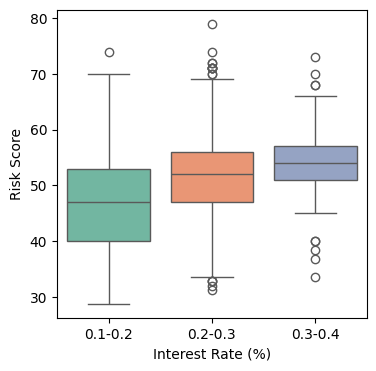

<ipython-input-60-04b013a0d1ad>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_ir = data.groupby('InterestRate')['LoanApproved'].value_counts().unstack(fill_value=0)


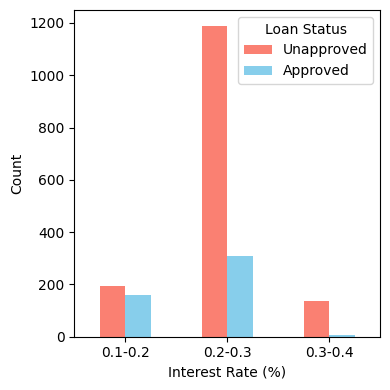

In [ ]:
bins = [0.1, 0.2, 0.3, 0.4]
labels = ['0.1-0.2', '0.2-0.3', '0.3-0.4']
data['InterestRate'] = pd.cut(data['InterestRate'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='InterestRate', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_ir = data.groupby('InterestRate')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_ir.plot(kind='bar', stacked=False, figsize=(4, 4), color=['salmon', 'skyblue'])
plt.xlabel('Interest Rate (%)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##MonthlyLoanPayment

<ipython-input-61-5310881e79c4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonthlyLoanPayment', y='RiskScore', data=data, palette='Set2')


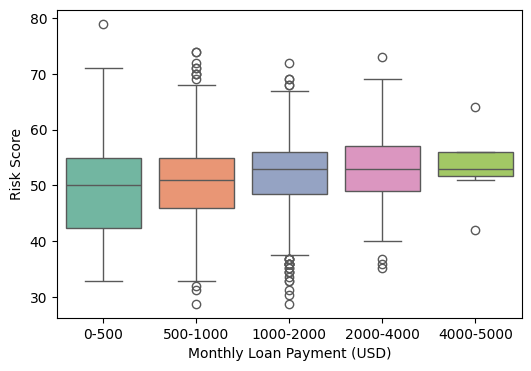

<ipython-input-61-5310881e79c4>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_mlp = data.groupby('MonthlyLoanPayment')['LoanApproved'].value_counts().unstack(fill_value=0)


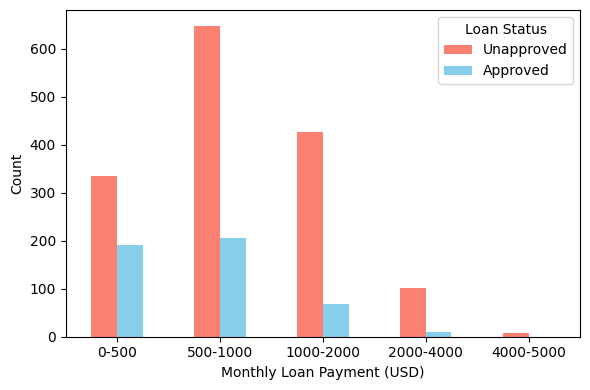

In [ ]:
bins = [0, 500, 1000, 2000, 4000, 5000]
labels = ['0-500', '500-1000', '1000-2000', '2000-4000', '4000-5000']
data['MonthlyLoanPayment'] = pd.cut(data['MonthlyLoanPayment'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='MonthlyLoanPayment', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Monthly Loan Payment (USD)')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_mlp = data.groupby('MonthlyLoanPayment')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_mlp.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Monthly Loan Payment (USD)')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##TotalDebtToIncomeRatio

<ipython-input-53-2758f061d44a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TotalDebtToIncomeRatio', y='RiskScore', data=data, palette='Set2')


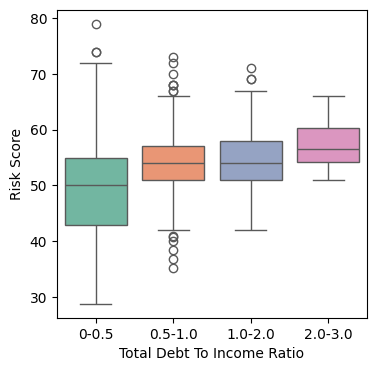

<ipython-input-53-2758f061d44a>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_tdtir = data.groupby('TotalDebtToIncomeRatio')['LoanApproved'].value_counts().unstack(fill_value=0)


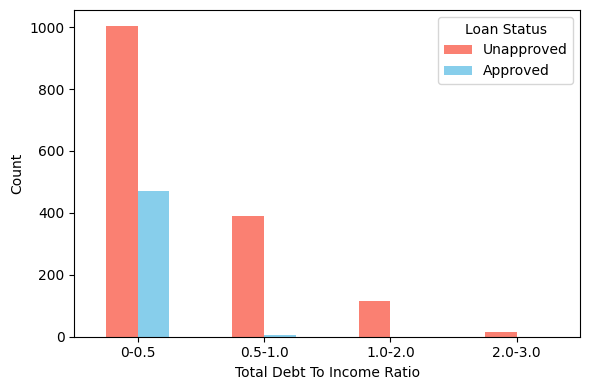

In [ ]:
bins = [0, 0.5, 1.0, 2.0, 3.0]
labels = ['0-0.5', '0.5-1.0', '1.0-2.0', '2.0-3.0']
data['TotalDebtToIncomeRatio'] = pd.cut(data['TotalDebtToIncomeRatio'], bins=bins, labels=labels, right=True, include_lowest=True)

# Plot
plt.figure(figsize=(4,4))
sns.boxplot(x='TotalDebtToIncomeRatio', y='RiskScore', data=data, palette='Set2')
plt.xlabel('Total Debt To Income Ratio')
plt.ylabel('Risk Score')
plt.show()

# Aggregate data
sum_tdtir = data.groupby('TotalDebtToIncomeRatio')['LoanApproved'].value_counts().unstack(fill_value=0)

# Plot
sum_tdtir.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])
plt.xlabel('Total Debt To Income Ratio')
plt.ylabel('Count')
plt.legend(['Unapproved', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##Biplot

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


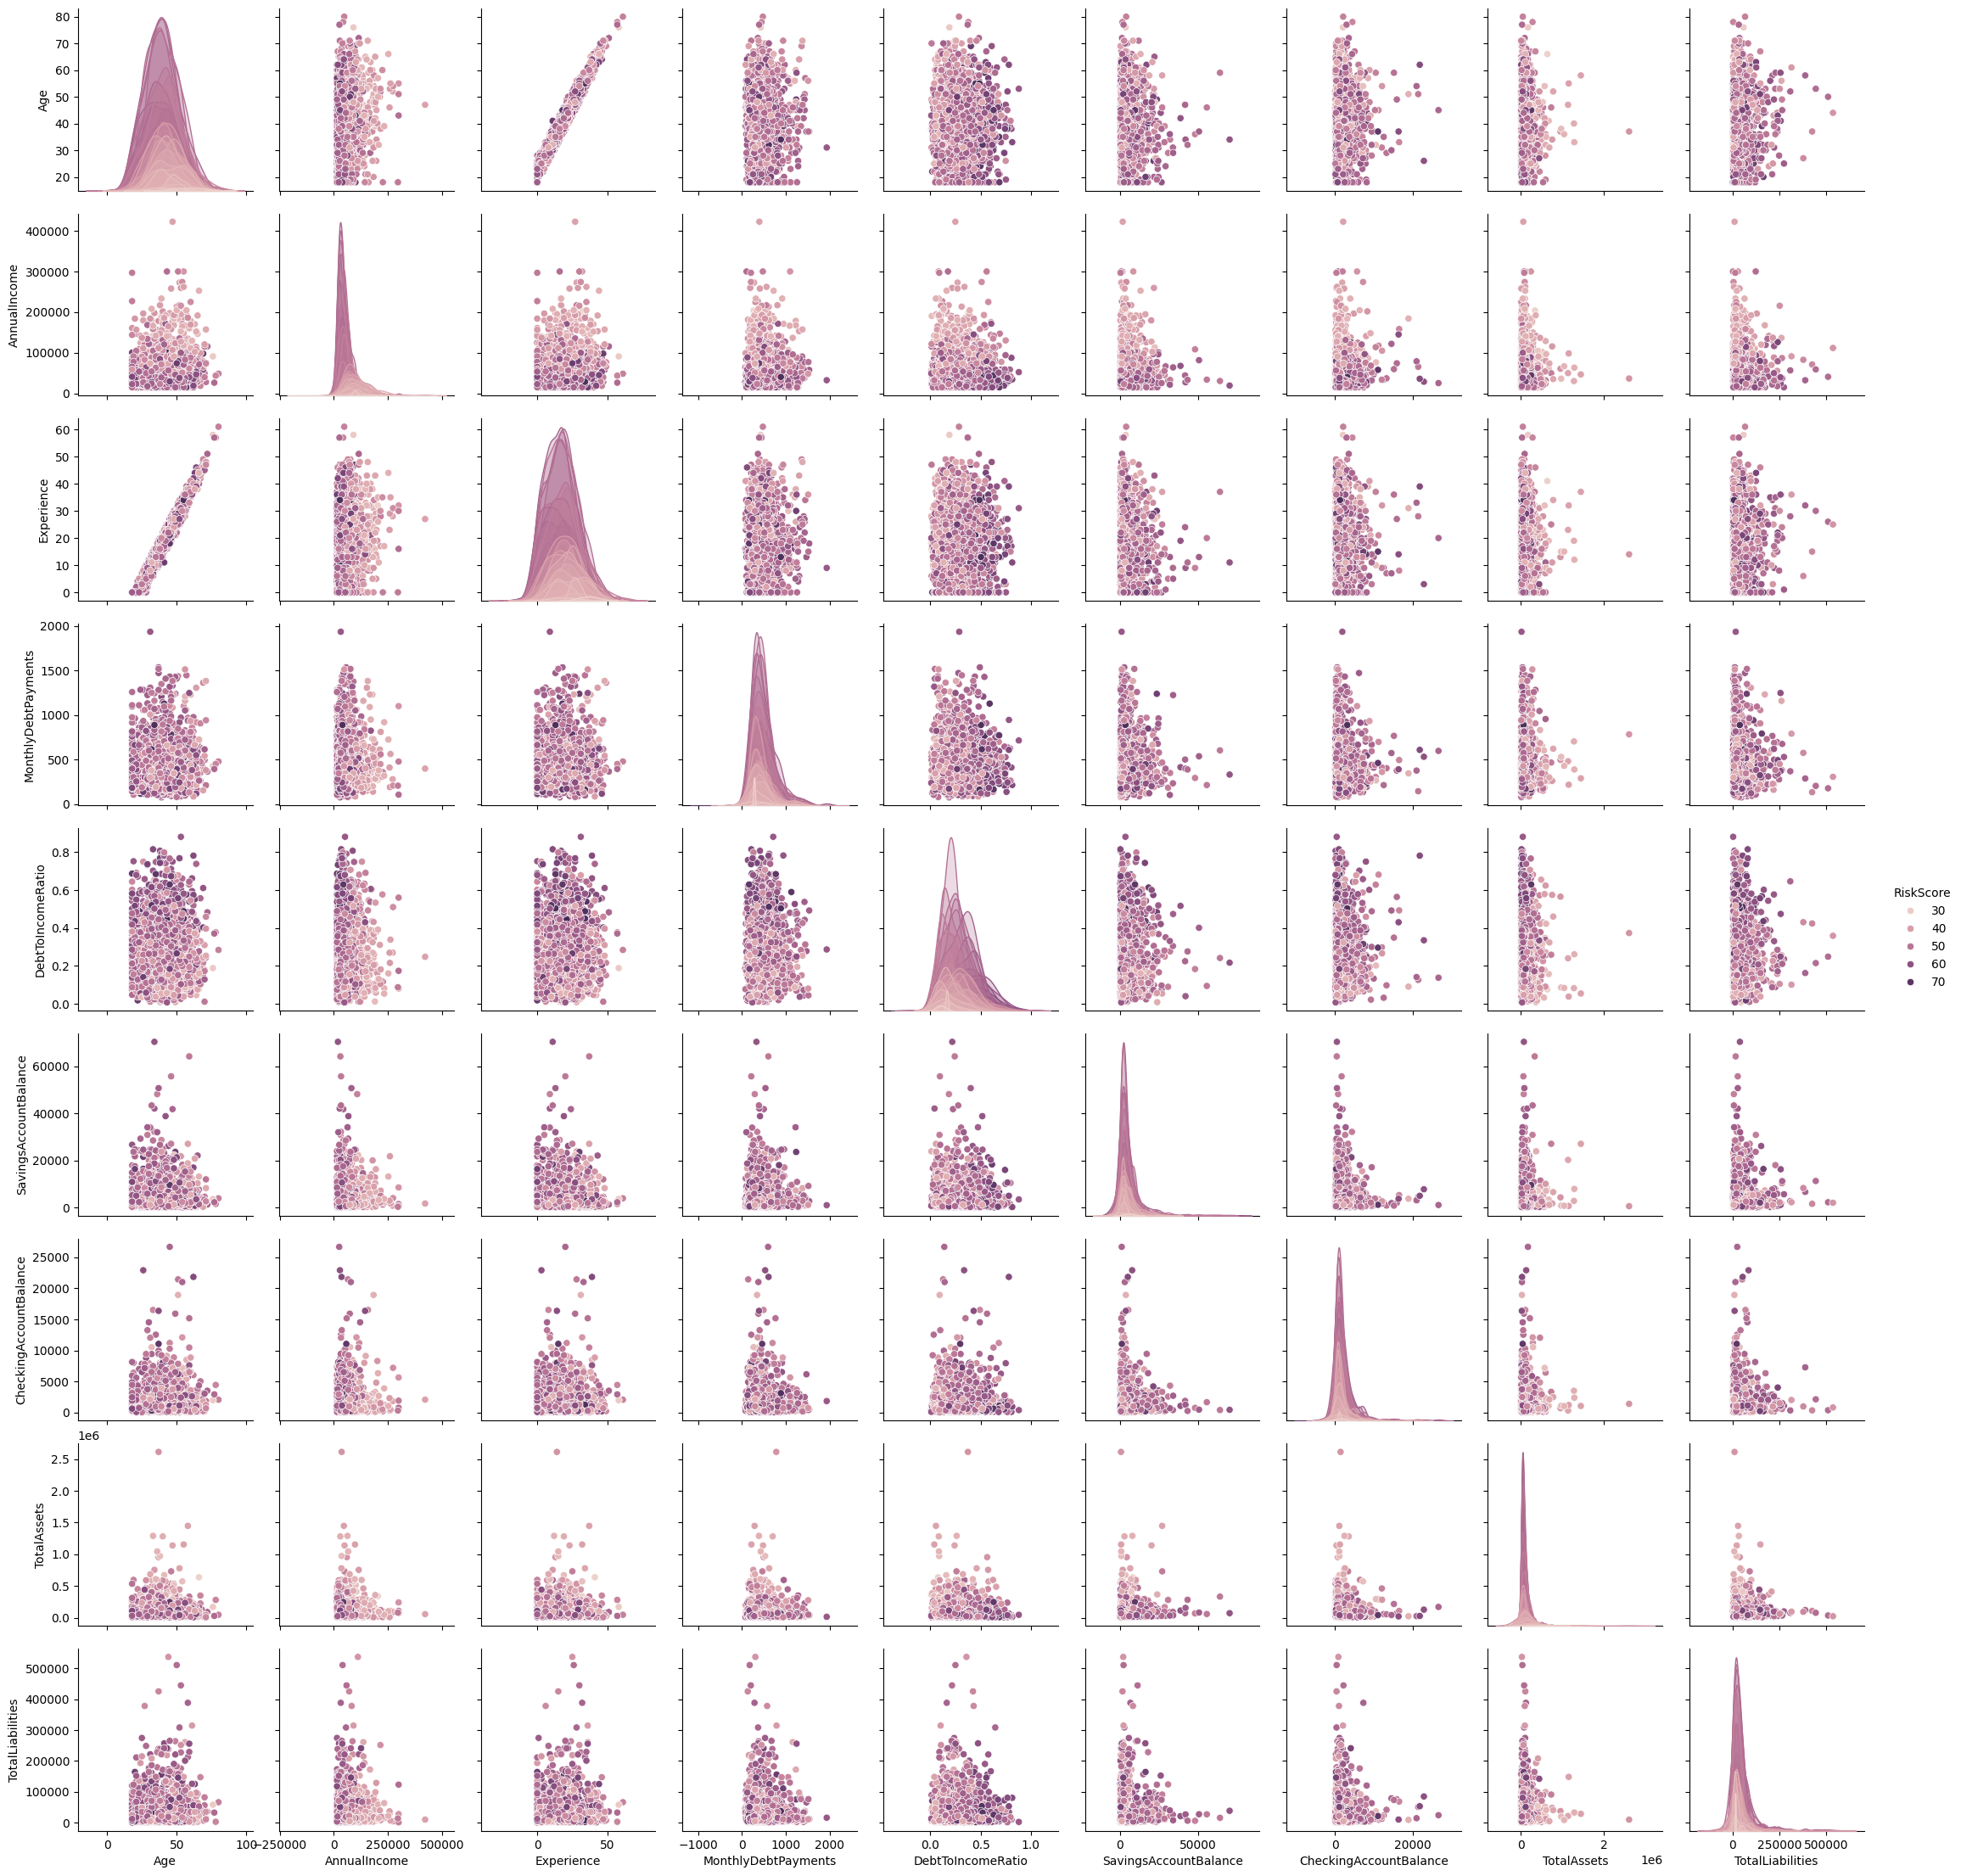

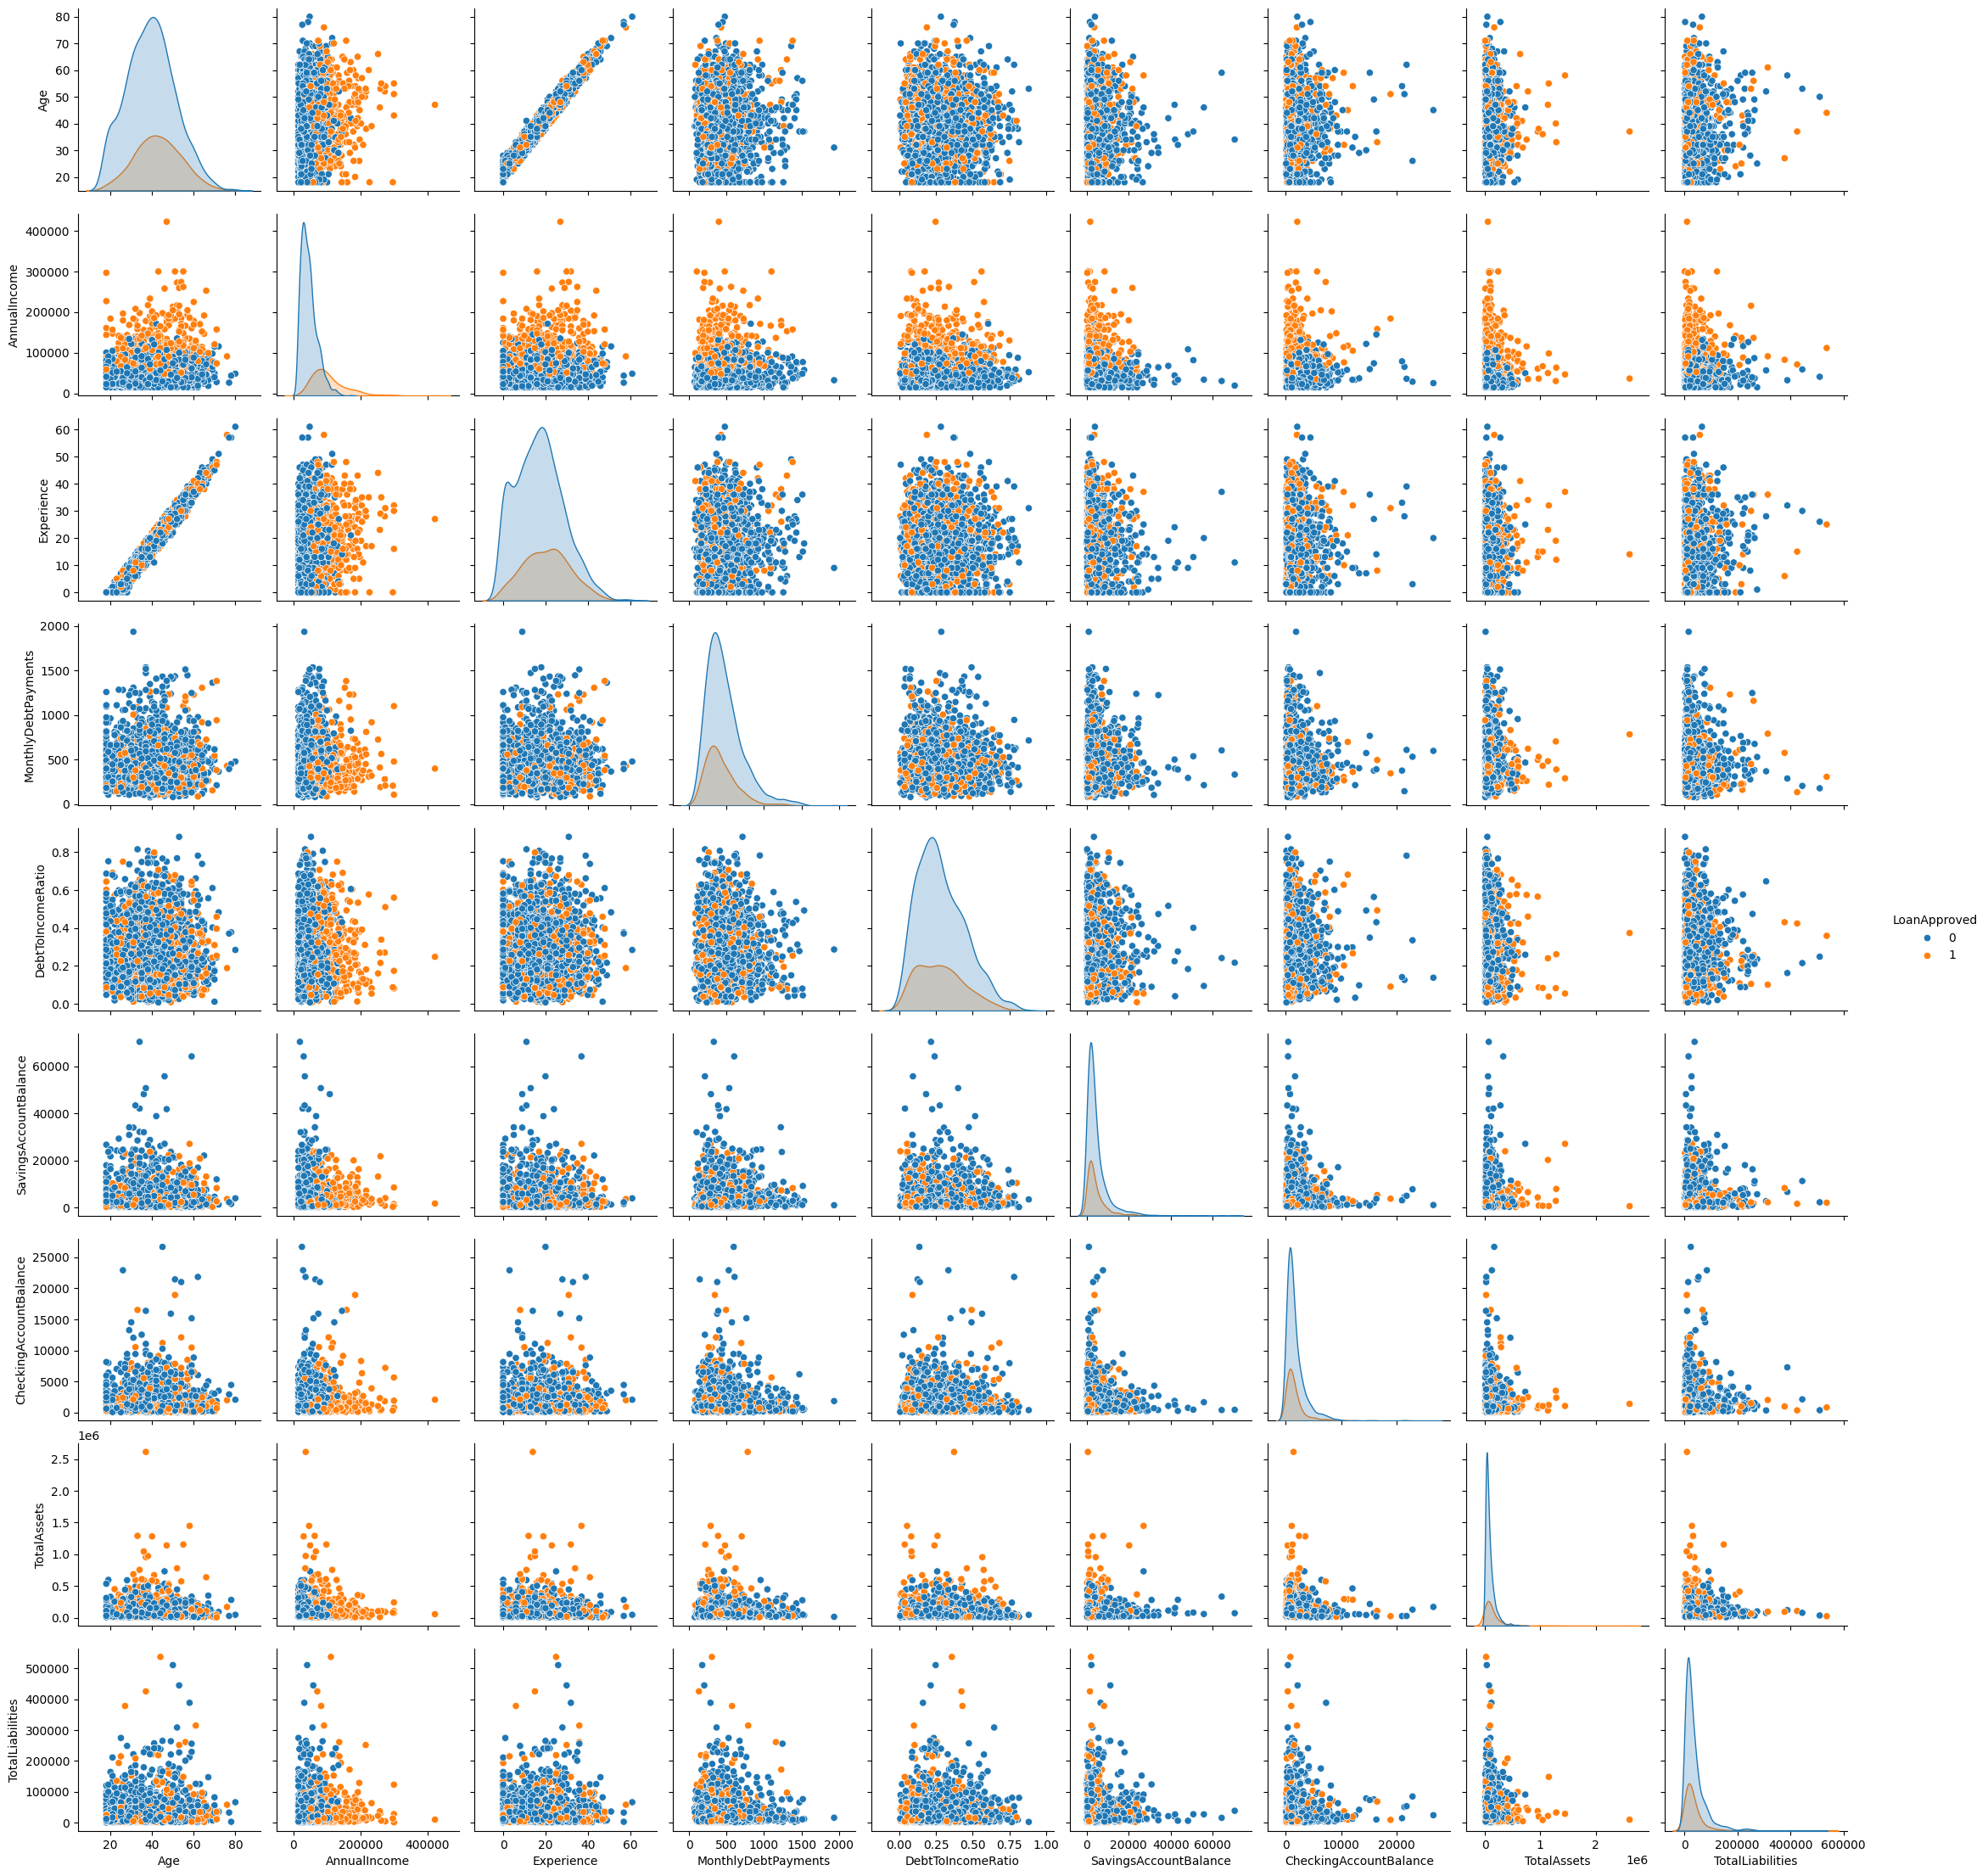

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload and read data
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/RBL_data_seaborn.xlsx"
data = pd.read_excel(path, engine="openpyxl")

RS = data.drop(['LoanApproved'], axis=1)
LA = data.drop(['RiskScore'], axis=1)

# Visualization of correlation results with seaborn library pairplot
sns.pairplot(RS, hue = "RiskScore")
sns.pairplot(LA, hue = "LoanApproved")